## Importing Libraries

In [1]:
# Loading all the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report

## Exploratory Data Analysis

In [2]:
# Loading the dataset
df = pd.read_csv('/content/movie_review_data.csv')

In [3]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
print("Total number of Rows:", df.shape[0])
print("Total number of Columns:", df.shape[1])

Total number of Rows: 5043
Total number of Columns: 28


In [5]:
# All the different columns in the dataset
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [6]:
# Statistical description of all the numerical features in the dataset
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


#### Analyzing the values above reveals the information below:
###### 1. From the count values, it could be inferred that most of the data, in the dataset, is available for analysis.
###### 2. Most movies are around 2 hours duration, with some being longer or shorter than the average time.
###### 3. All the facebook like columns are long tailed.
###### 4. Most movies makes around 4.8 million dollars at the box office, with a std value of 6.8 which demonstrates that there is a significant deviation with some movies making much less or more than the average. Similarily, budget as well is showning huge deviation around the mean value.
###### 5. Most movie posters have around 1-2 faces.
###### 6. Many movies have been released in and around the year 2002.
###### 7. Most movies have an average imbd_score between 6-7.

In [7]:
# Data Types of all the features in the dataset
df.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [8]:
# General information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [9]:
# Checking for duplicate fields in the dataset
print("Total count of duplicate rows in the dataset is", df.duplicated().sum())

Total count of duplicate rows in the dataset is 45


In [10]:
# Printing all the duplicate rows
df[df.duplicated()]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
137,Color,David Yates,248.0,110.0,282.0,103.0,Alexander Skarsgård,11000.0,124051759.0,Action|Adventure|Drama|Romance,...,239.0,English,USA,PG-13,180000000.0,2016.0,10000.0,6.6,2.35,29000
187,Color,Bill Condon,322.0,115.0,386.0,12000.0,Kristen Stewart,21000.0,292298923.0,Adventure|Drama|Fantasy|Romance,...,329.0,English,USA,PG-13,120000000.0,2012.0,17000.0,5.5,2.35,65000
204,Color,Hideaki Anno,1.0,120.0,28.0,12.0,Shin'ya Tsukamoto,544.0,NaN,Action|Adventure|Drama|Horror|Sci-Fi,...,13.0,Japanese,Japan,NaN,NaN,2016.0,106.0,8.2,2.35,0
303,Color,Joe Wright,256.0,111.0,456.0,394.0,Cara Delevingne,20000.0,34964818.0,Adventure|Family|Fantasy,...,186.0,English,USA,PG,150000000.0,2015.0,548.0,5.8,2.35,24000
389,Color,Josh Trank,369.0,100.0,128.0,78.0,Reg E. Cathey,596.0,56114221.0,Action|Adventure|Sci-Fi,...,695.0,English,USA,PG-13,120000000.0,2015.0,360.0,4.3,2.35,41000
395,Color,Rob Cohen,187.0,106.0,357.0,4000.0,Vin Diesel,23000.0,144512310.0,Action|Crime|Thriller,...,988.0,English,USA,PG-13,38000000.0,2001.0,14000.0,6.7,2.35,14000
590,Color,Brett Ratner,245.0,101.0,420.0,467.0,Rufus Sewell,12000.0,72660029.0,Action|Adventure,...,269.0,English,USA,PG-13,100000000.0,2014.0,3000.0,6.0,2.35,21000
656,Color,Paul Verhoeven,196.0,113.0,719.0,217.0,Rachel Ticotin,605.0,119412921.0,Action|Sci-Fi,...,391.0,English,USA,R,65000000.0,1990.0,308.0,7.5,1.85,0
794,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
1220,Color,Angelina Jolie Pitt,322.0,137.0,11000.0,465.0,Jack O'Connell,769.0,115603980.0,Biography|Drama|Sport|War,...,351.0,English,USA,PG-13,65000000.0,2014.0,698.0,7.2,2.35,35000


In [11]:
# Removing all the duplicate rows from the dataset
df = df.drop_duplicates()
# Checking for the presence of duplicate rows, after dropping off all the duplicates
print("Current total count of duplicates in the dataset", df.duplicated().sum())

Current total count of duplicates in the dataset 0


In [12]:
print("Total number of rows are", df.shape[0])
print("Total number of columns are", df.shape[1])

Total number of rows are 4998
Total number of columns are 28


In [13]:
# Checking for the Null values in the dataset
print("Total null value against every column in the dataset is: \n")
df.isnull().sum()

Total null value against every column in the dataset is: 



color                         19
director_name                103
num_critic_for_reviews        49
duration                      15
director_facebook_likes      103
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        874
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                152
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               301
budget                       487
title_year                   107
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 327
movie_facebook_likes           0
dtype: int64

In [14]:
# Percentage of missing values in each feature
(df.isnull().sum()/len(df)*100)

color                         0.380152
director_name                 2.060824
num_critic_for_reviews        0.980392
duration                      0.300120
director_facebook_likes       2.060824
actor_3_facebook_likes        0.460184
actor_2_name                  0.260104
actor_1_facebook_likes        0.140056
gross                        17.486995
genres                        0.000000
actor_1_name                  0.140056
movie_title                   0.000000
num_voted_users               0.000000
cast_total_facebook_likes     0.000000
actor_3_name                  0.460184
facenumber_in_poster          0.260104
plot_keywords                 3.041216
movie_imdb_link               0.000000
num_user_for_reviews          0.420168
language                      0.240096
country                       0.100040
content_rating                6.022409
budget                        9.743898
title_year                    2.140856
actor_2_facebook_likes        0.260104
imdb_score               

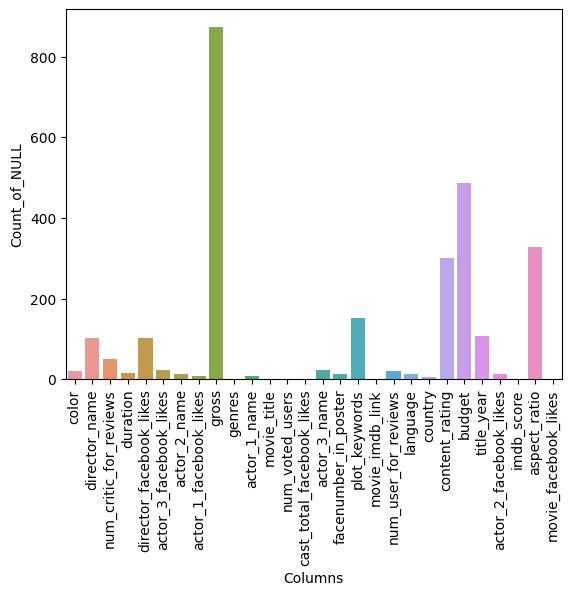

In [15]:
# Plot for visualizing all the missing values in the dataset
null_values = pd.DataFrame(zip(df.columns, df.isnull().sum()), columns=['Columns','Count_of_NULL'])
sns.barplot( data=null_values, x="Columns", y='Count_of_NULL')
plt.xticks(rotation=90)
plt.show()

<ipython-input-16-b44747486001>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


<Axes: >

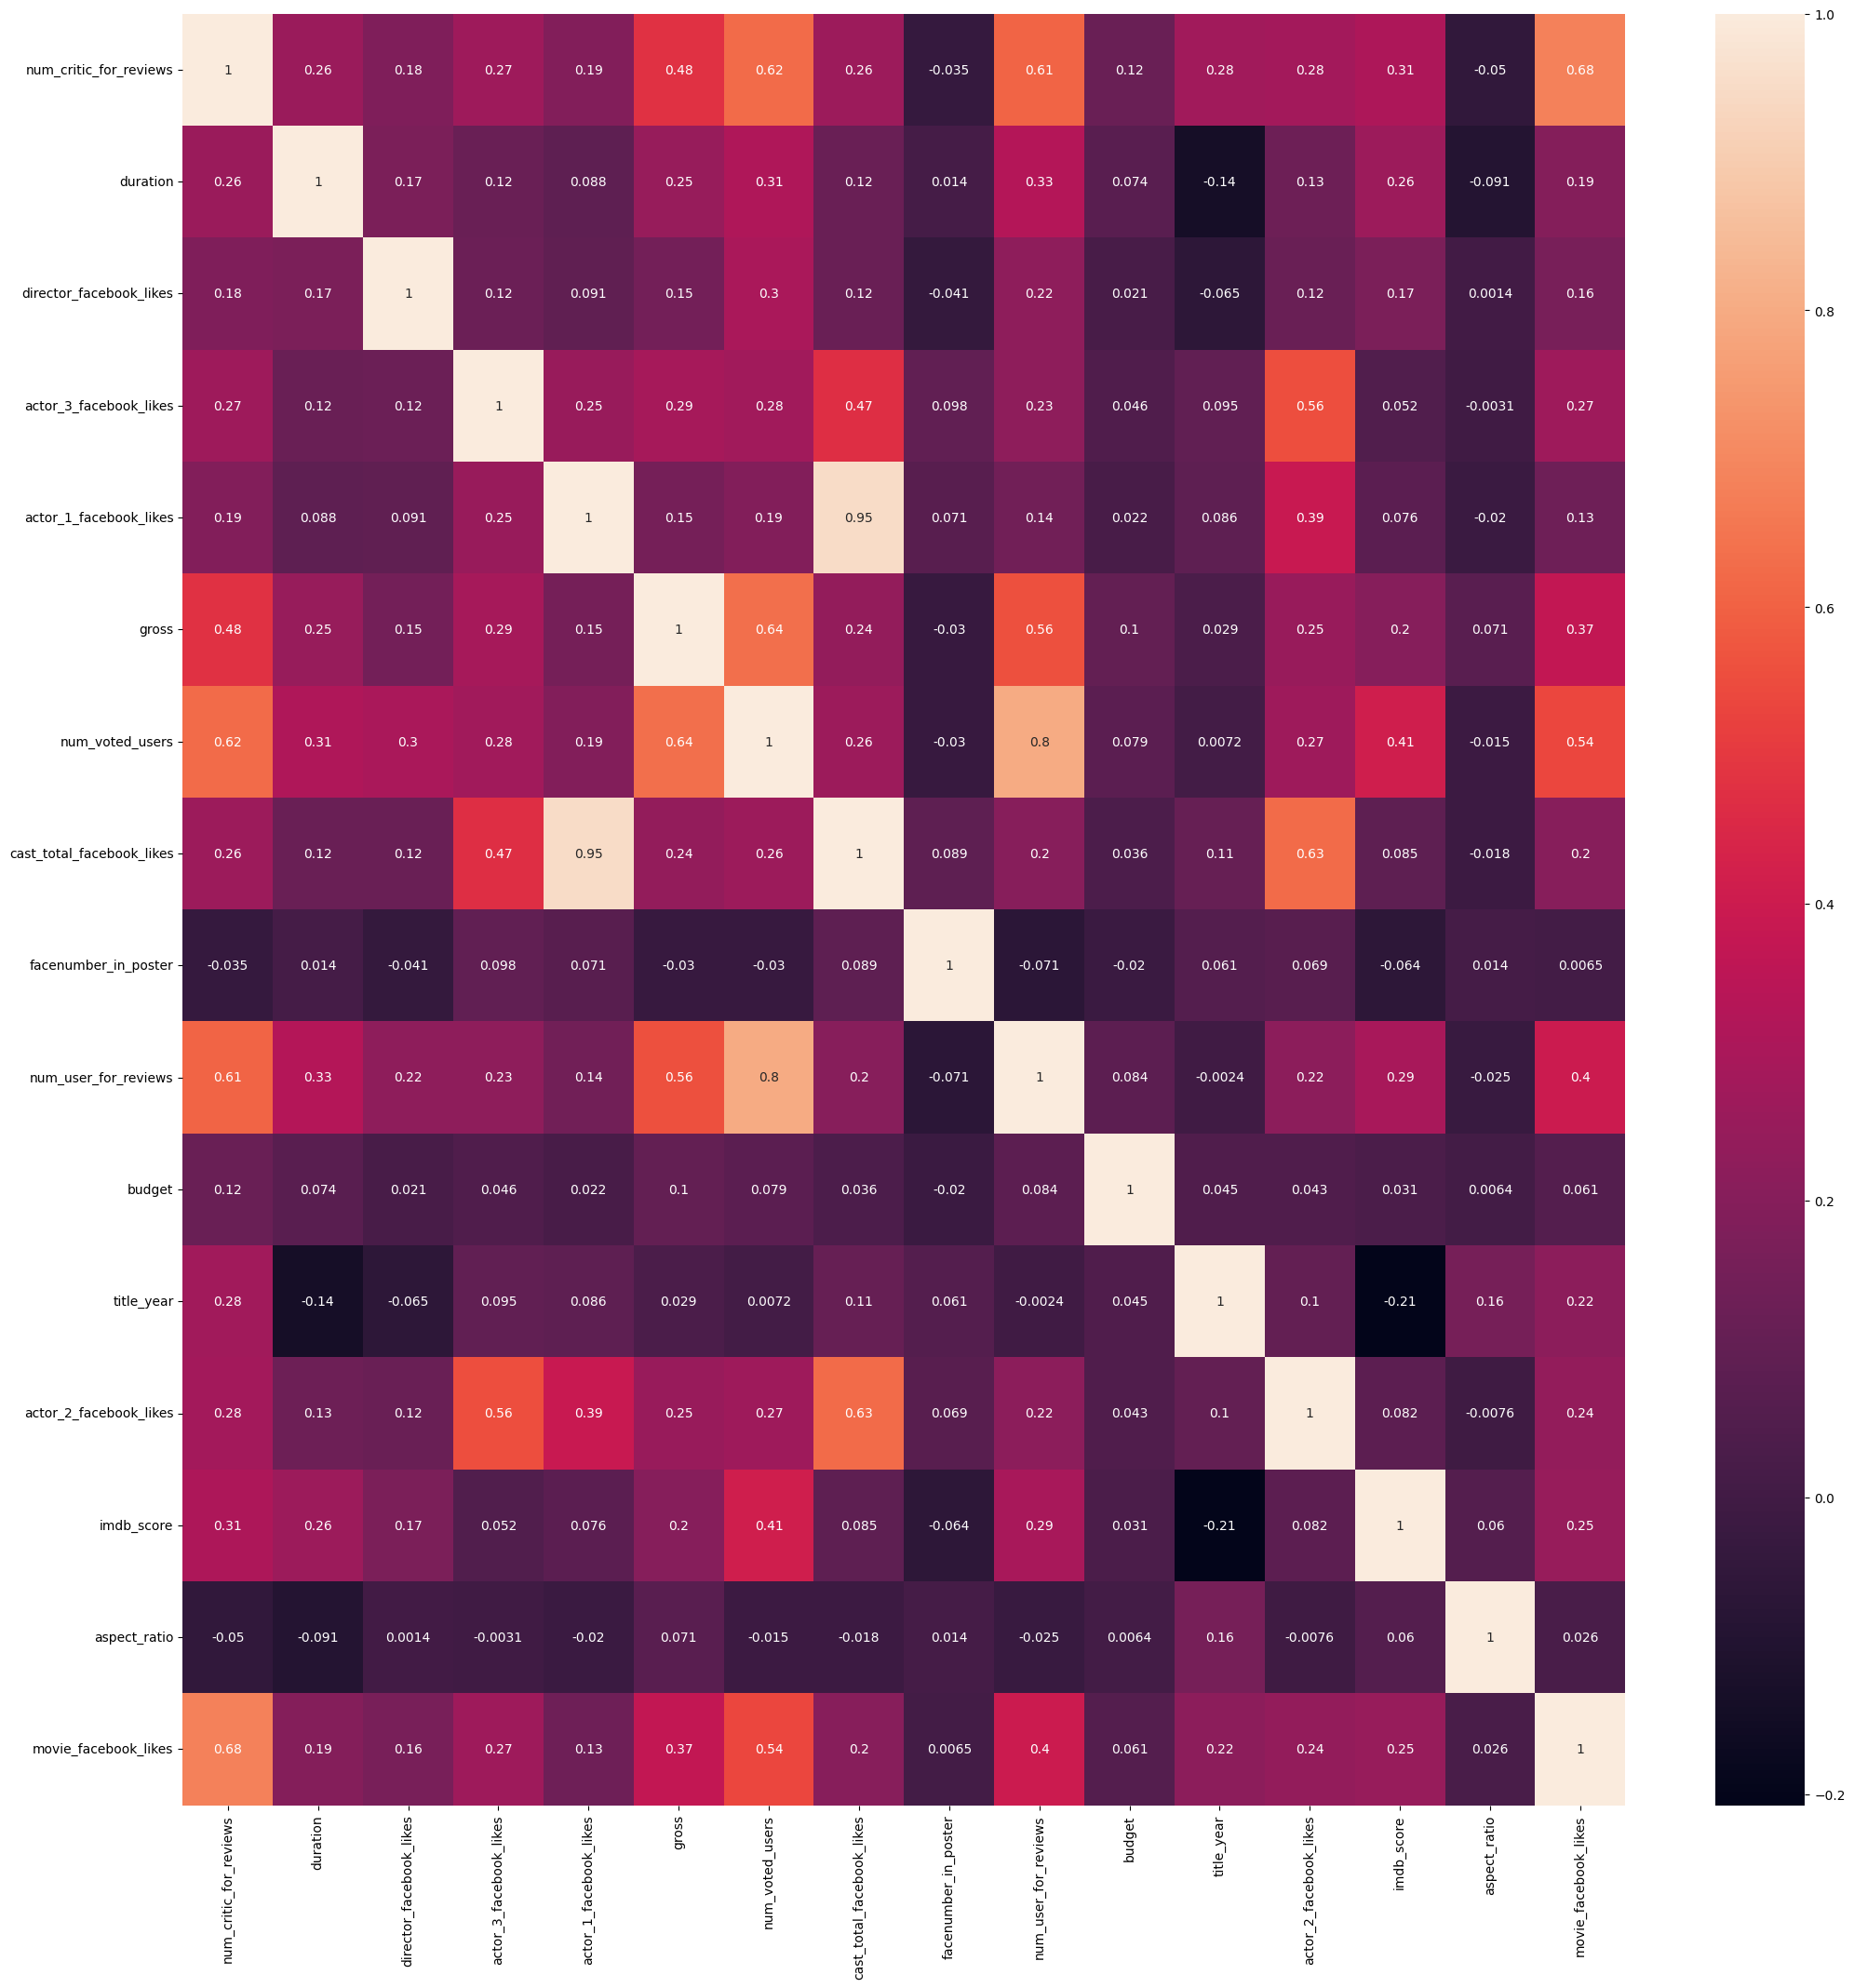

In [16]:
# Plotting heatmap for visualizing the correlation between different numerical features in the dataset
correlation_matrix = df.corr()
plt.figure(figsize=(25, 25))
sns.heatmap(correlation_matrix, annot=True)

## Data Imputation
#### For Handling the missing values in the dataset

#### Imputing gross - It has the highest count of missing values hence it is very important to impute its missing value carefully and not drop the missing fields as that would led to a huge loss of data.

In [17]:
print("Maximum gross value", df.gross.max())
print("Minimum gross value", df.gross.min())

Maximum gross value 760505847.0
Minimum gross value 162.0


<Axes: xlabel='gross'>

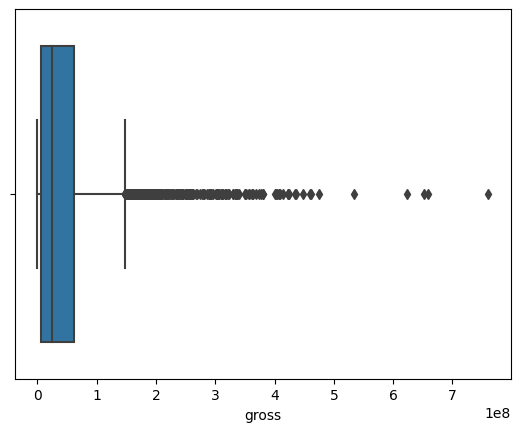

In [18]:
# Visualizing distribution of gross
sns.boxplot(x=df['gross'])

##### From the boxplot above, we can see that the data is heavy tailed with many outliers. Also from the heatmap above we can conclude that there's a good positive correlation between the features gross and num_voted_users. So, it means that if the num_voted_users is more, the gross value as well tends to be higher. Therefore, I'll use num_voted_users for filling in the missing gross values.

In [19]:
print("Minimum value for people voting for a movie", df.num_voted_users.min())
print("Maximum value for people voting for a movie", df.num_voted_users.max())

Minimum value for people voting for a movie 5
Maximum value for people voting for a movie 1689764


In [20]:
# Checking for the gross value against the minimum number of votes user gave
df.query("num_voted_users == 5")["gross"].iloc[0]

nan

In [21]:
# Checking for the 10 least votes given by the user
df["num_voted_users"].nsmallest(10)

4702    5
4958    5
279     6
4244    6
4716    6
4880    6
4323    7
4436    7
4       8
3816    8
Name: num_voted_users, dtype: int64

In [22]:
# Checking for the gross value against another minimum value of the votes given by the user
df.query("num_voted_users == 8")["gross"].iloc[0]

nan

##### It seems that mostly the gross value with lower values of num_voted_users is null.

In [23]:
# Checking for the gross value against the maximum value of the votes given by the user
df.query("num_voted_users == 1689764")["gross"].iloc[0]

28341469.0

In [24]:
# Binning the contiuous feature um_voted_users into 4 different categories
buckets = [0, 100000, 500000, 1000000, 2000000]

# Creating buckets using pandas cut
df['num_voted_users_bucket'] = pd.cut(df['num_voted_users'], bins=buckets, labels=['<100k', '100k-500k', '500k-1M', '1M-2M'])

In [25]:
# Printing out the number of fields under each category in num_voted_users_bucket
bucket_counts = df['num_voted_users_bucket'].value_counts().sort_index()
print(bucket_counts)

<100k        3792
100k-500k    1097
500k-1M        96
1M-2M          13
Name: num_voted_users_bucket, dtype: int64


##### For the majority of the data points, the num_voted_user value is less than 100k

In [26]:
# Calculate the number of missing gross values in each bucket
missing_gross_counts = df[df['gross'].isnull()].groupby('num_voted_users_bucket').size()
print(missing_gross_counts)

num_voted_users_bucket
<100k        837
100k-500k     35
500k-1M        2
1M-2M          0
dtype: int64


##### The category with less than 100k num_voted_users has maximum fields with missing gross detail

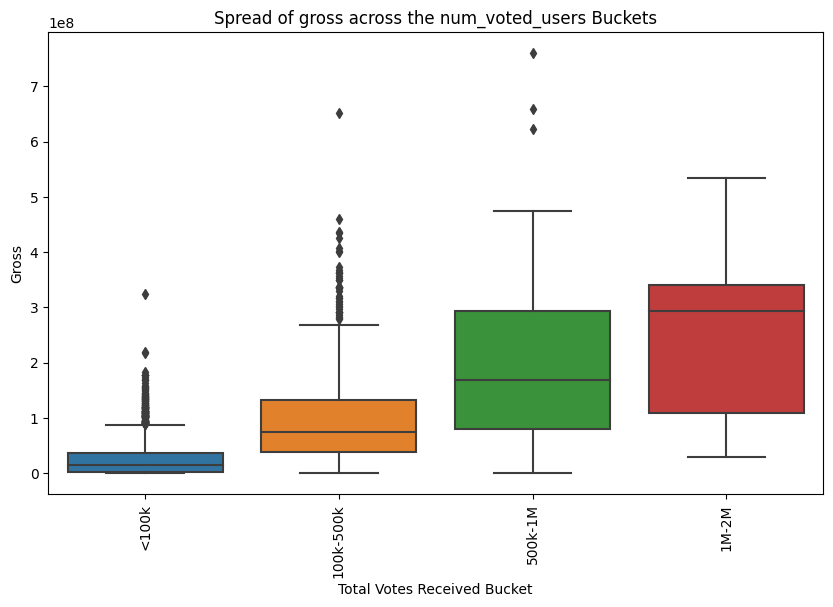

In [27]:
# Create a box plot to visualize gross values within each num_voted_users bucket
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='num_voted_users_bucket', y='gross')
plt.xlabel('Total Votes Received Bucket')
plt.ylabel('Gross')
plt.title('Spread of gross across the num_voted_users Buckets')
plt.xticks(rotation=90)
plt.show()

In [28]:
# As the first and the second boxplots, in the visualization above, has outliers, we will use Median for imputing the missing values
# Median is resistant to outliers
bucket_medians = df.groupby('num_voted_users_bucket')['gross'].median()

In [29]:
print("Median gross for each category in num_voted_users_bucket:", bucket_medians)

Median gross for each category in num_voted_users_bucket: num_voted_users_bucket
<100k         14375181.0
100k-500k     74819354.0
500k-1M      169222196.0
1M-2M        292568851.0
Name: gross, dtype: float64


In [30]:
# Function to fill missing gross values based on bucket_medians
def fill_gross(row):
    if pd.isnull(row['gross']):
        return bucket_medians[row['num_voted_users_bucket']]
    return row['gross']

In [31]:
df['gross'] = df.apply(fill_gross, axis=1)

In [32]:
# check for the status of null values after imputation
df.gross.isnull().sum()

0

#### Imputing budget

In [33]:
print("Maximum value for budget:", df.budget.max())
print("Minimum value for budget:", df.budget.min())

Maximum value for budget: 12215500000.0
Minimum value for budget: 218.0


<Axes: xlabel='budget'>

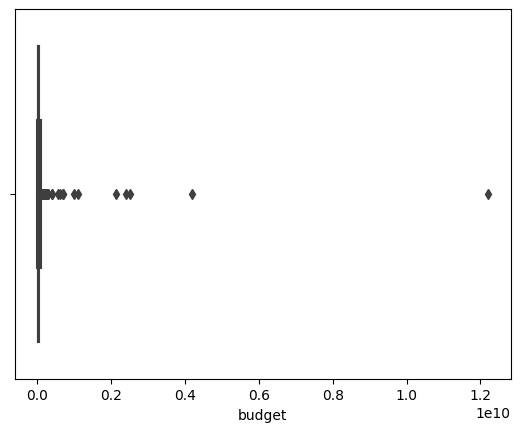

In [34]:
# Plot for visualizing the distribution of the feature budget
sns.boxplot(x=df['budget'])

In [35]:
# Imputing the missing values using Median as the feature has outlier and the Range of Spread of the data is very high
df['budget'].fillna(df['budget'].median(), inplace=True)

In [36]:
df.budget.isnull().sum()

0

#### Imputing aspect_ratio

In [37]:
# Printing all the different types of aspect_ratio in which a movie is made
print("Unique Values in aspect_ratio:", df.aspect_ratio.unique())

Unique Values in aspect_ratio: [ 1.78  2.35   nan  1.85  2.    2.2   2.39  2.24  1.33  4.    1.66  1.5
 16.    1.77  2.4   1.37  2.76  1.18  1.44  2.55  1.2   1.75  1.89]


<Axes: xlabel='aspect_ratio'>

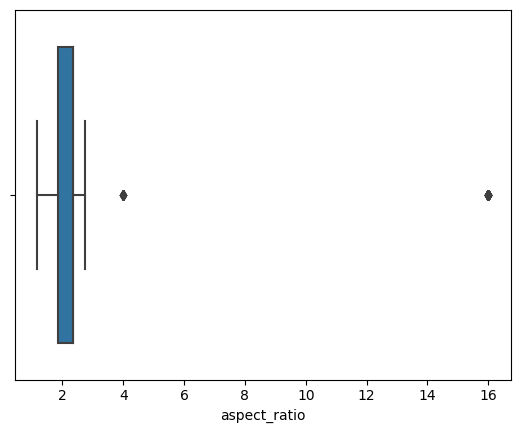

In [38]:
# Boxplot for visualizing the data distribution of the feature
sns.boxplot(x=df['aspect_ratio'])

In [39]:
# Using Median for imputing the missing values
df['aspect_ratio'].fillna(df['aspect_ratio'].median(), inplace=True)

In [40]:
df.aspect_ratio.isnull().sum()

0

##### Imputing content_rating

In [41]:
# Checking for all the unique values in content_rating
df.content_rating.unique()

array(['PG-13', nan, 'PG', 'G', 'R', 'TV-14', 'TV-PG', 'TV-MA', 'TV-G',
       'Not Rated', 'Unrated', 'Approved', 'TV-Y', 'NC-17', 'X', 'TV-Y7',
       'GP', 'Passed', 'M'], dtype=object)

In [42]:
# Filling in the missing values with an already existing categorical value in this feature, 'Not Rated'
df.content_rating.fillna('Not Rated', inplace = True)

In [43]:
df.content_rating.isnull().sum()

0

#### Imputing plot_keywords

In [44]:
# Printing the series of plot_keywords
print(df.plot_keywords)

0                  avatar|future|marine|native|paraplegic
1       goddess|marriage ceremony|marriage proposal|pi...
2                     bomb|espionage|sequel|spy|terrorist
3       deception|imprisonment|lawlessness|police offi...
4                                                     NaN
                              ...                        
5038               fraud|postal worker|prison|theft|trial
5039         cult|fbi|hideout|prison escape|serial killer
5040                                                  NaN
5041                                                  NaN
5042    actress name in title|crush|date|four word tit...
Name: plot_keywords, Length: 4998, dtype: object


In [45]:
# Dropping off the fields with missing plot_keywords as there is no existing feature in the dataset using which can be used for deriving
# the plot on which the movies are based on except this particular feature itself
df = df.dropna(axis = 0, subset = ['plot_keywords'])
df.plot_keywords.isnull().sum()

0

#### Imputing title_year

In [46]:
# Dropping off all the missing rows as title_year cannot be extracted from any of the existing feature in the dataset
df = df.dropna(axis = 0, subset = ['title_year'])
df.title_year.isnull().sum()

0

#### Imputing director_name

In [47]:
# Dropping off all the missing rows as director_name cannot be extracted from any of the existing feature in the dataset
df = df.dropna(axis = 0, subset = ['director_name'])
df.director_name.isnull().sum()

0

#### Imputing num_critic_for_reviews

In [48]:
print(df.num_critic_for_reviews)

0       723.0
1       302.0
2       602.0
3       813.0
5       462.0
        ...  
5035     56.0
5036      NaN
5037     14.0
5038      1.0
5042     43.0
Name: num_critic_for_reviews, Length: 4752, dtype: float64


<Axes: xlabel='num_critic_for_reviews'>

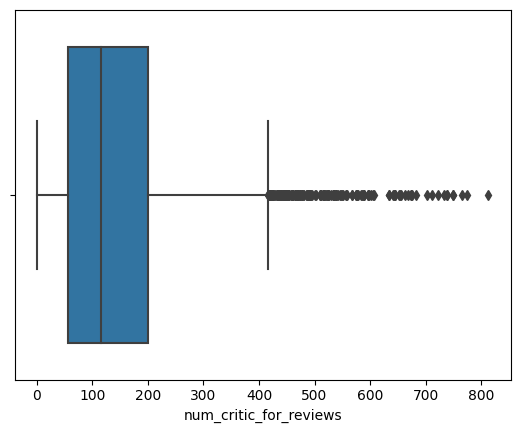

In [49]:
# Plotting the distribution of the continuous variable num_critic_for_reviews
sns.boxplot(x=df['num_critic_for_reviews'])

#### From the histogram plotted above, it can be inferred that there is positive correlation between num_critic_for_reviews and movie_facebook_likes

In [50]:
print("Minimum number of facebook likes for the movie", df.movie_facebook_likes.min())
print("Maximum number of facebook likes for the movie", df.movie_facebook_likes.max())

Minimum number of facebook likes for the movie 0
Maximum number of facebook likes for the movie 349000


In [51]:
# Bucketing movie_facebook_likes feature
buckets = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000]

# Creating buckets using pandas cut
df['movie_facebook_likes_bucket'] = pd.cut(df['movie_facebook_likes'], bins=buckets, labels=['<50k', '50k-100k', '100k-150k', '150k-200k', '200k-250k', '250k-300k', '300k-350k'])

In [52]:
# checking the distribution of data across different categories in movie_facebook_likes_bucket
bucket_counts = df['movie_facebook_likes_bucket'].value_counts().sort_index()
print(bucket_counts)

<50k         2480
50k-100k      137
100k-150k      34
150k-200k       9
200k-250k       0
250k-300k       0
300k-350k       1
Name: movie_facebook_likes_bucket, dtype: int64


In [53]:
# Calculating the number of missing value count in each bucket
missing_critic_counts = df[df['num_critic_for_reviews'].isnull()].groupby('movie_facebook_likes_bucket').size()
print(missing_critic_counts)

movie_facebook_likes_bucket
<50k         20
50k-100k      0
100k-150k     0
150k-200k     0
200k-250k     0
250k-300k     0
300k-350k     0
dtype: int64


##### Most of the data in movie_facebook_likes has less than 50k likes, and all the missing values in num_critic_for_reviews falls under the <50k category

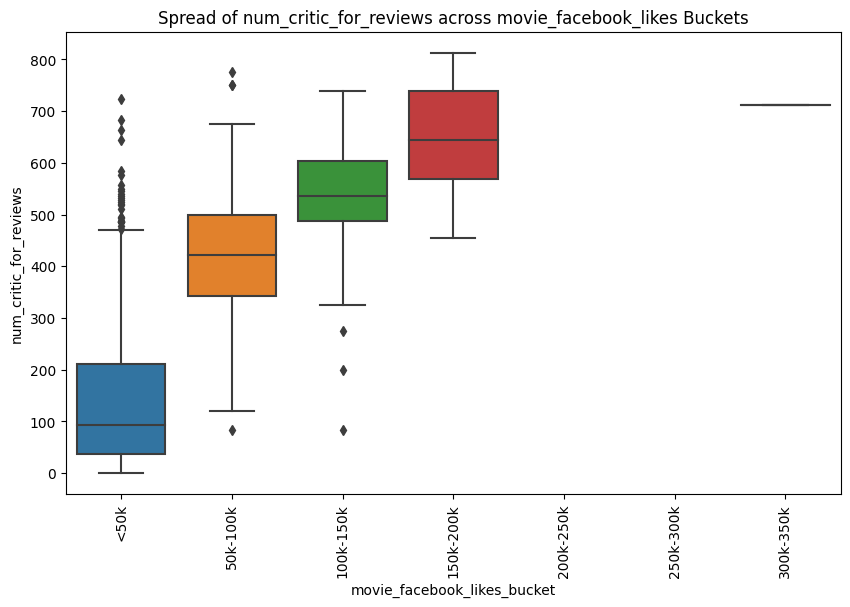

In [54]:
# Box plot to visualize num_critic_for_reviews in each movie_facebook_likes bucket
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='movie_facebook_likes_bucket', y='num_critic_for_reviews')
plt.xlabel('movie_facebook_likes_bucket')
plt.ylabel('num_critic_for_reviews')
plt.title('Spread of num_critic_for_reviews across movie_facebook_likes Buckets')
plt.xticks(rotation=90)
plt.show()

In [55]:
# As there is outlier, I will use median for imputation
bucket_medians = df.groupby('movie_facebook_likes_bucket')['num_critic_for_reviews'].median()

In [56]:
print(bucket_medians)

movie_facebook_likes_bucket
<50k          94.0
50k-100k     422.0
100k-150k    536.0
150k-200k    645.0
200k-250k      NaN
250k-300k      NaN
300k-350k    712.0
Name: num_critic_for_reviews, dtype: float64


In [57]:
df['num_critic_for_reviews'].fillna(94, inplace=True)
df.num_critic_for_reviews.isnull().sum()

0

#### Imputing facenumber_in_poster

<Axes: xlabel='facenumber_in_poster'>

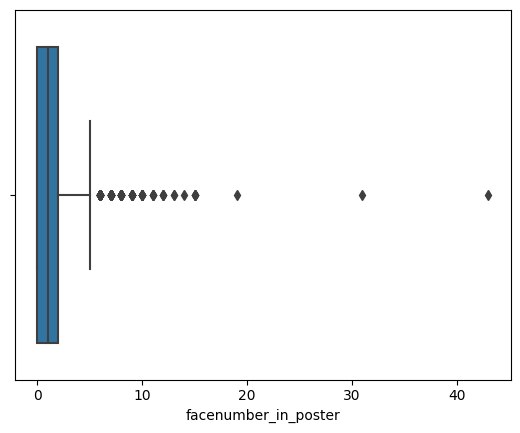

In [58]:
# Visualizing distribution of the feature facenumber_in_poster
sns.boxplot(x=df['facenumber_in_poster'])

In [59]:
# Using median for imputing missing values as there is outliers
facenumber_in_poster_median = df.facenumber_in_poster.median()
df.facenumber_in_poster.fillna(facenumber_in_poster_median, inplace = True)
df.facenumber_in_poster.isnull().sum()

0

#### Imputing color

In [60]:
print("Unique values of color:",df.color.unique())

Unique values of color: ['Color' ' Black and White' nan]


([<matplotlib.patches.Wedge at 0x78227d776aa0>,
 [Text(-1.0902574486585992, 0.14607770413188428, 'Color'),
  Text(1.0902574452394034, -0.14607772965120144, 'Black and White')])

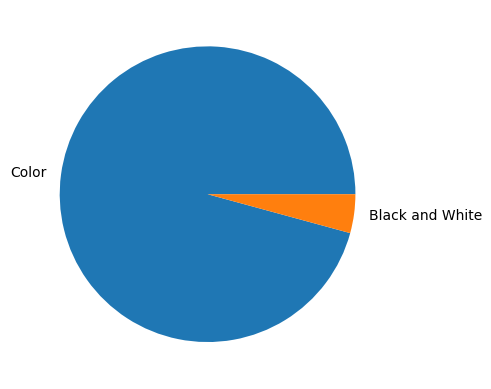

In [61]:
# Visualizing the distribution of both the unique values in the color feature
x = df['color'].value_counts()
names = ['Color', 'Black and White']
plt.pie(x, labels=names)

In [62]:
# Find the maximum and minimum years for color movies
color_max_year = df[df['color'] == 'Color']['title_year'].max()
color_min_year = df[df['color'] == 'Color']['title_year'].min()
print("Latest year for Colored movies", color_max_year)
print("Starting year for Colored movies", color_min_year)

Latest year for Colored movies 2016.0
Starting year for Colored movies 1937.0


In [63]:
# Find the maximum and minimum years for black and white movies
bw_max_year = df[df['color'] == ' Black and White']['title_year'].max()
bw_min_year = df[df['color'] == ' Black and White']['title_year'].min()
print("Latest year for B/W movies", bw_max_year)
print("Starting year for B/W movies", bw_min_year)

Latest year for B/W movies 2015.0
Starting year for B/W movies 1916.0


In [64]:
null_color_years = df[df['color'].isnull()]['title_year']
print("Year for rows with Null values in the feature color:")
print(null_color_years)

Year for rows with Null values in the feature color:
1948    2010.0
2015    2014.0
2753    2009.0
3272    2015.0
3539    2014.0
3638    2011.0
3656    2012.0
4138    2014.0
4331    2012.0
4846    1990.0
5020    2011.0
Name: title_year, dtype: float64


In [65]:
# As there is no strong title_year range when either color or black and white movies have been preferred,
# I'll impute the missing values using mode
color_mode = df.color.mode().iloc[0]
df.color.fillna(color_mode, inplace = True)
df.color.isnull().sum()

0

#### Imputing duration

<Axes: xlabel='duration'>

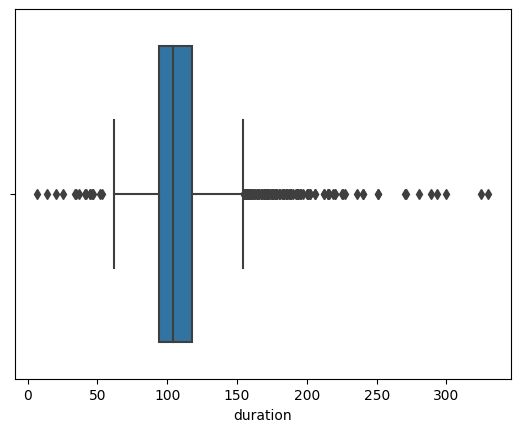

In [66]:
# Visualizing duration distribution
sns.boxplot(x=df['duration'])

In [67]:
# Imputing missing values using median
duration_median = df.duration.median()
df.duration.fillna(duration_median, inplace = True)
df.duration.isnull().sum()

0

#### Imputing num_user_for_reviews

##### There is a strong positive corelation between num_voted_users and num_user_for_reviews, hence I will use num_voted_users_buckets for imputing the missing values in num_user_for_reviews accurately

In [68]:
# Calculate the number of missing num_user_for_reviews values in each num_voted_users bucket
missing_num_user_reviews_counts = df[df['num_user_for_reviews'].isnull()].groupby('num_voted_users_bucket').size()
print(missing_num_user_reviews_counts)

num_voted_users_bucket
<100k        6
100k-500k    0
500k-1M      0
1M-2M        0
dtype: int64


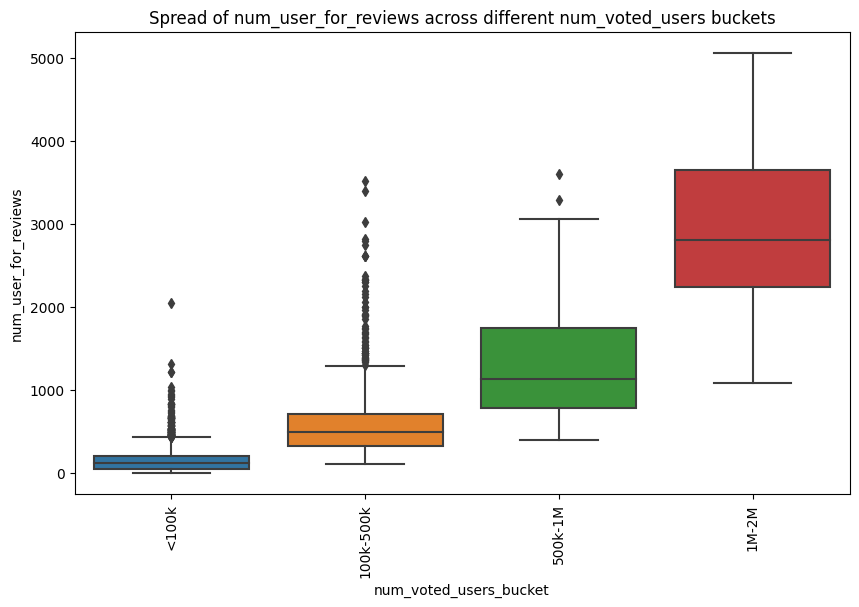

In [69]:
# Create a box plot to visualize num_user_for_reviewss values within each bucket of num_voted_users
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='num_voted_users_bucket', y='num_user_for_reviews')
plt.xlabel('num_voted_users_bucket')
plt.ylabel('num_user_for_reviews')
plt.title('Spread of num_user_for_reviews across different num_voted_users buckets')
plt.xticks(rotation=90)
plt.show()

In [70]:
# Using median for imputation as there is outlier
bucket_medians = df.groupby('num_voted_users_bucket')['num_user_for_reviews'].median()

In [71]:
# Function to fill missing values for num_user_for_reviews, using bucket medians
def fill_num_user_reviews(row):
    if pd.isnull(row['num_user_for_reviews']):
        return bucket_medians[row['num_voted_users_bucket']]
    return row['num_user_for_reviews']

In [72]:
df['num_user_for_reviews'] = df.apply(fill_num_user_reviews, axis=1)

In [73]:
df.num_user_for_reviews.isnull().sum()

0

#### Imputing actor_2_name

In [74]:
# Dropping off the missing rows as it cannot be imputated from existing features in the dataset
df = df.dropna(axis = 0, subset = ['actor_2_name'])
df.actor_2_name.isnull().sum()

0

#### Imputing actor_3_name

In [75]:
# Dropping off the missing rows as it cannot be imputated from existing features in the dataset
df = df.dropna(axis = 0, subset = ['actor_3_name'])
df.actor_3_name.isnull().sum()

0

#### Imputing country

In [76]:
print("Unique countries in the dataset:", df.country.unique())

Unique countries in the dataset: ['USA' 'UK' 'New Zealand' 'Canada' 'Australia' 'Belgium' 'Japan' 'Germany'
 'China' 'France' 'New Line' 'Spain' 'Hong Kong' 'Czech Republic' 'India'
 'Soviet Union' 'South Korea' 'Peru' 'Italy' 'Russia' 'Aruba' 'Denmark'
 'Libya' 'Mexico' 'Ireland' 'South Africa' 'Switzerland' 'Romania'
 'West Germany' 'Chile' 'Netherlands' 'Hungary' 'Panama' 'Greece' 'Sweden'
 'Taiwan' 'Official site' 'Cambodia' 'Thailand' 'Slovakia' 'Bulgaria'
 'Iran' 'Georgia' 'Iceland' 'Norway' 'Turkey' 'Nigeria' 'Brazil' 'Finland'
 'Bahamas' 'Argentina' nan 'Colombia' 'Poland' 'Israel' 'Kyrgyzstan'
 'Indonesia' 'Pakistan' 'Afghanistan' 'Philippines']


In [77]:
# Display the movie title with missing country name
df[['movie_title']][df['country'].isnull()]

,movie_title
4021,Dawn Patrol


In [78]:
# Percentage of movies from every unique countries
((df['country'].value_counts())/len(df))*100

USA               76.086957
UK                 8.864500
France             3.144787
Canada             2.258337
Germany            2.026171
Australia          1.118615
Spain              0.675390
India              0.590967
China              0.506543
Japan              0.443225
Italy              0.422119
Hong Kong          0.337695
New Zealand        0.316589
South Korea        0.253271
Denmark            0.232165
Ireland            0.232165
Mexico             0.232165
Russia             0.232165
South Africa       0.168848
Brazil             0.168848
Norway             0.147742
Sweden             0.105530
Thailand           0.105530
Netherlands        0.105530
Iran               0.084424
Argentina          0.084424
Israel             0.063318
Belgium            0.063318
Czech Republic     0.063318
Switzerland        0.063318
West Germany       0.063318
Iceland            0.042212
Taiwan             0.042212
Greece             0.042212
Poland             0.042212
Hungary            0

In [79]:
# Imputing the missing value with the country name as USA because it is the place where maximum movies are produced and also the movie_title
# suggests the country to be USA
df.loc[[4021], 'country'] = 'USA'
df.country.isnull().sum()

0

#### Imputing laguage

In [80]:
print("Unique languages in the dataset:", df.language.unique())

Unique languages in the dataset: ['English' 'Japanese' 'French' 'Mandarin' 'Aboriginal' 'Spanish'
 'Filipino' 'Hindi' 'Russian' 'Maya' 'Kazakh' 'Telugu' 'Cantonese'
 'German' 'Aramaic' 'Italian' 'Dutch' 'Dari' 'Hebrew' 'Mongolian'
 'Swedish' 'Korean' 'Thai' 'Bosnian' 'None' 'Hungarian' 'Portuguese' nan
 'Icelandic' 'Danish' 'Arabic' 'Norwegian' 'Czech' 'Zulu' 'Polish'
 'Dzongkha' 'Vietnamese' 'Indonesian' 'Urdu' 'Romanian' 'Persian' 'Greek']


In [81]:
# Displaying the country of origin and the movie_title for all the rows with missing language
df[['movie_title', 'country']][df['language'].isnull()]

,movie_title,country
3086,September Dawn,USA
3539,Alpha and Omega 4: The Legend of the Saw Tooth...,USA
3869,Silent Movie,USA
4110,Love's Abiding Joy,USA
4810,Intolerance: Love's Struggle Throughout the Ages,USA
4885,The Big Parade,USA
4958,Over the Hill to the Poorhouse,USA


In [82]:
# As the movie_title suggests and most movies produced in the USA is in English language, I'll impute it using the same
df.loc[[3086, 3539, 3869, 4110, 4810, 4885, 4958], 'language'] = 'English'
df.language.isnull().sum()

0

In [83]:
# Dataset shape after handling all the missing values
df.shape

(4738, 30)

In [84]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes',
       'num_voted_users_bucket', 'movie_facebook_likes_bucket'],
      dtype='object')

In [85]:
# Dropping off the additional bucket features created for imputing missing values
df = df.drop(columns=['num_voted_users_bucket','movie_facebook_likes_bucket'], axis=1)

In [86]:
# Checking for null values
df.isnull().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [87]:
# Performing feature selection by dropping off the redundant columns of facebook likes, as that information is already present in another
# feature, 'cast_total_facebook_likes'.
# Also dropping off movie_imdb_link as that will not add any value to the target that we want to predict
df = df.drop(columns=['actor_1_facebook_likes','actor_2_facebook_likes', 'actor_3_facebook_likes', 'movie_imdb_link'], axis=1)

In [88]:
df.shape

(4738, 24)

## Data Visualization
#### For understanding the pattern and how are the different features in the dataset related

In [89]:
# Years with maximum number of movies produced
print(df['title_year'].value_counts().reset_index().sort_values(by='title_year', ascending=False).head(10))

    index  title_year
0  2009.0         254
1  2006.0         236
2  2010.0         224
3  2008.0         222
4  2014.0         221
5  2011.0         217
6  2013.0         216
7  2005.0         216
8  2004.0         208
9  2012.0         205


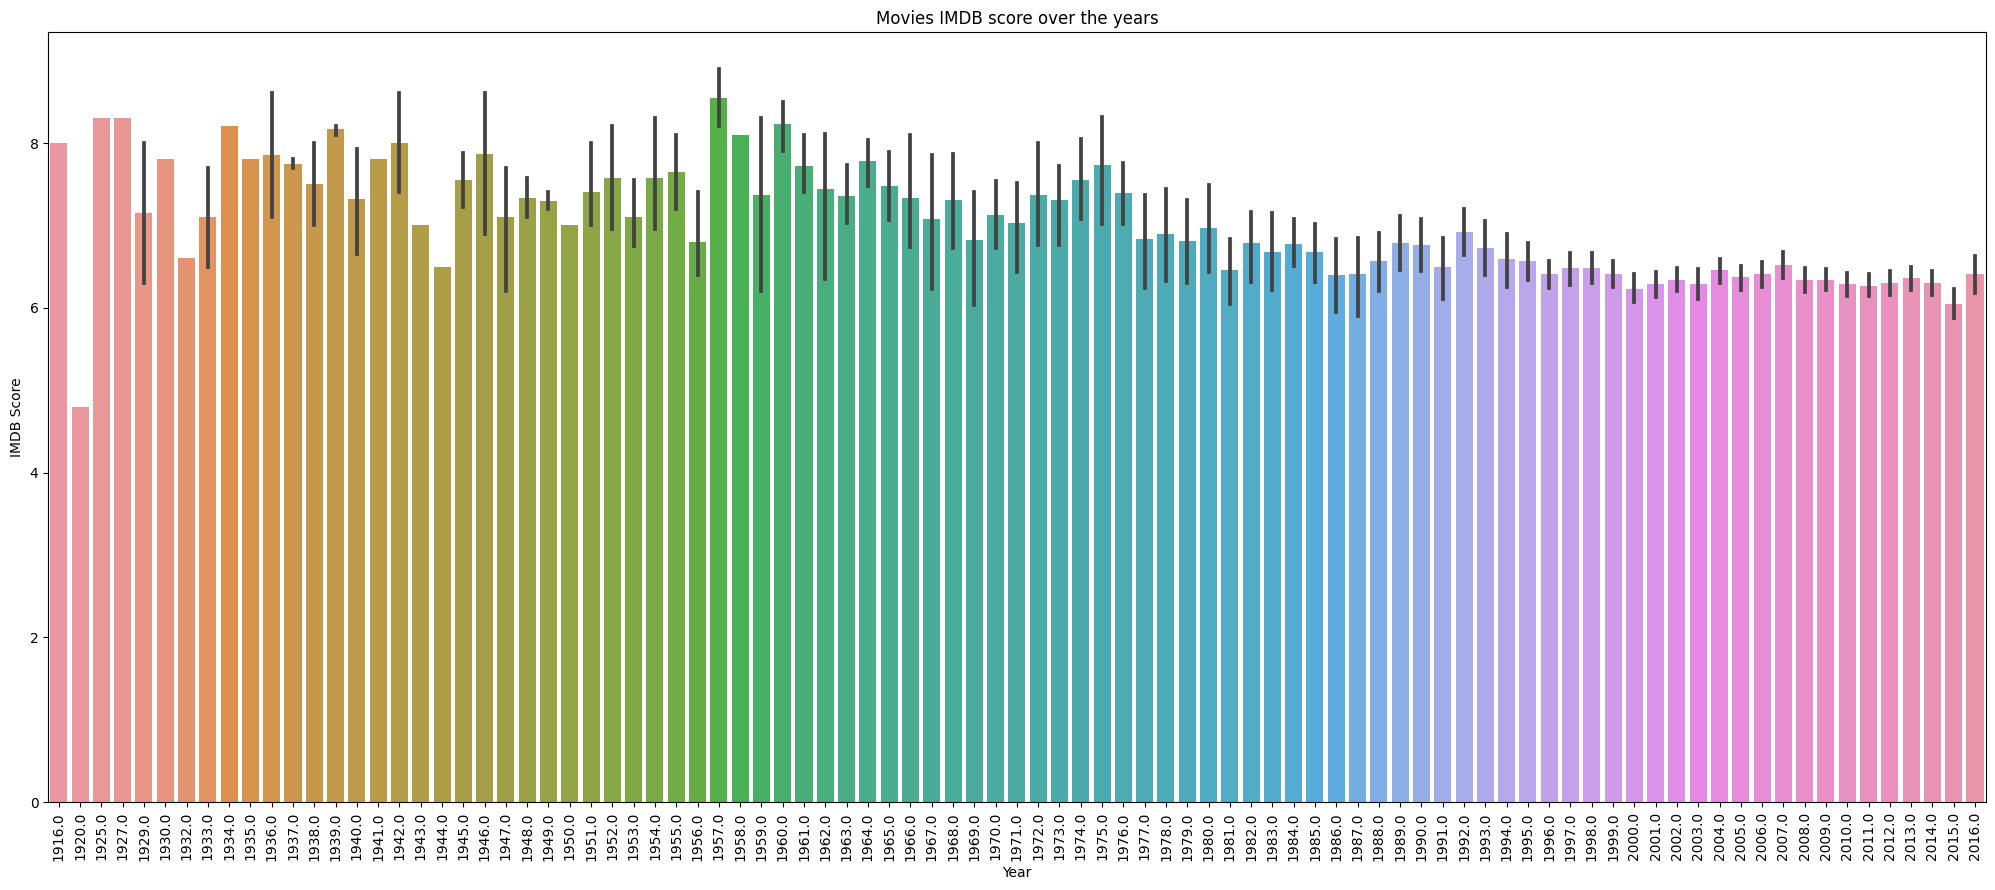

In [90]:
# Plot for visualizing imdb_score of movies, over 100 years
plt.figure(figsize=(25,10))
plt.title('Movies IMDB score over the years')
sns.barplot(x = df.title_year, y=df.imdb_score)
plt.xlabel('Year')
plt.ylabel('IMDB Score')
plt.xticks(rotation=90)
plt.show()

In [91]:
# Popularity of movies over the years as per the facebook likes on the movie
popularity_by_year = df.groupby('title_year')['movie_facebook_likes'].sum()

In [92]:
popularity_by_year.sort_values(ascending=False)

title_year
2013.0    5907735
2012.0    5153072
2014.0    4930445
2015.0    4348721
2011.0    3569723
           ...   
1947.0         44
1920.0          0
1934.0          0
1958.0          0
1941.0          0
Name: movie_facebook_likes, Length: 91, dtype: int64

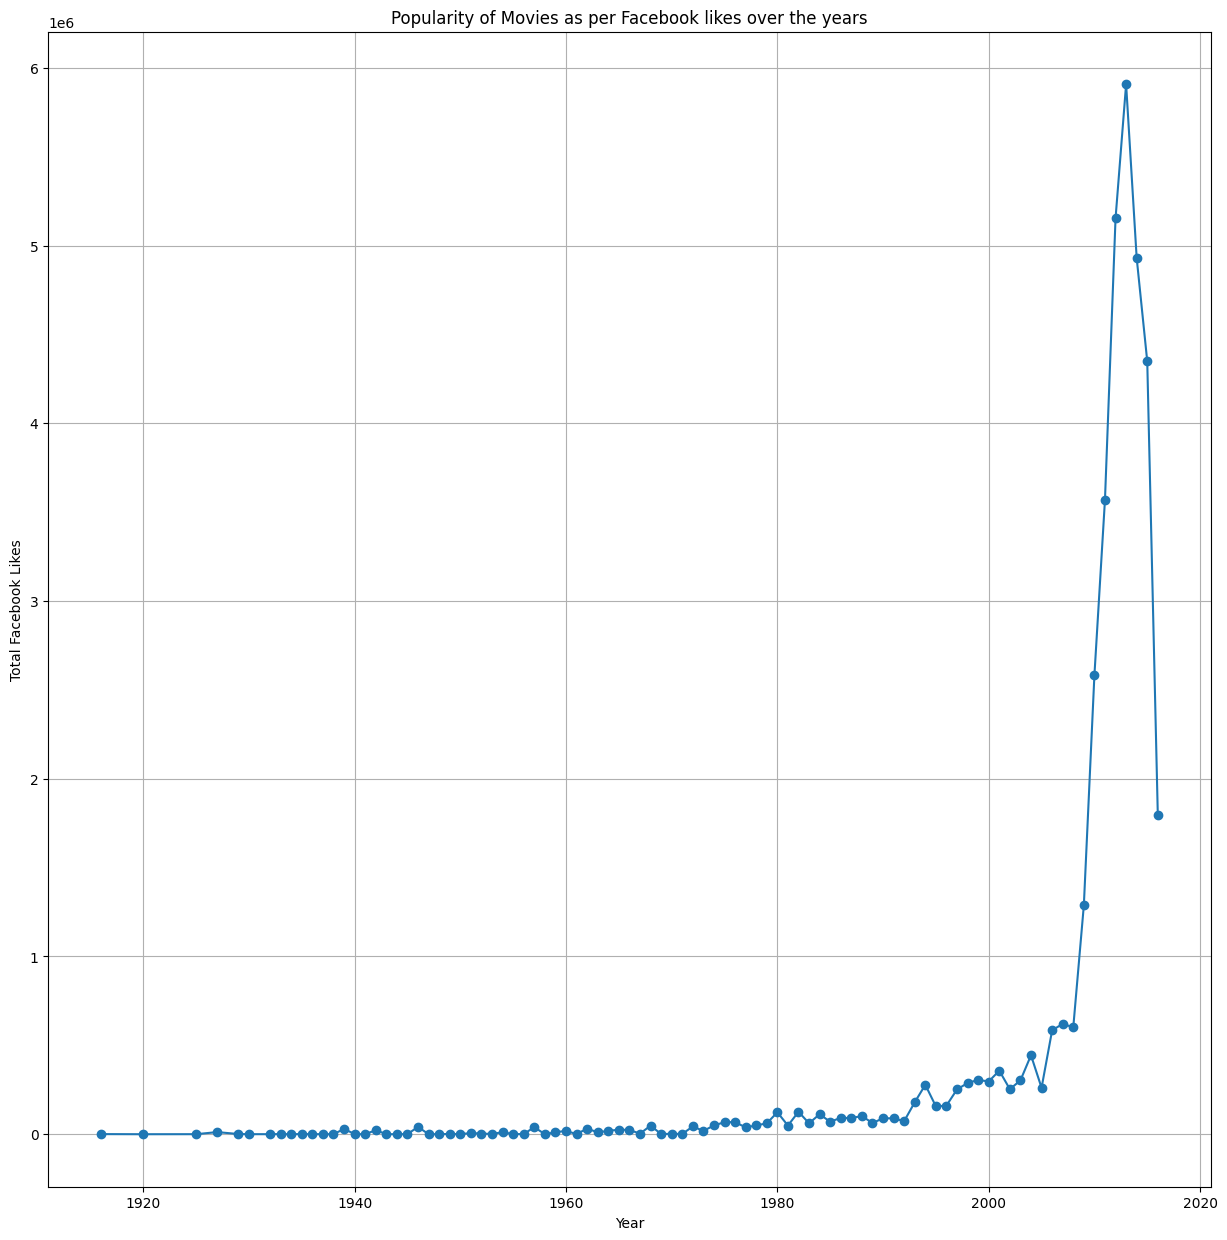

In [93]:
plt.figure(figsize=(15, 15))
plt.plot(popularity_by_year.index, popularity_by_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Total Facebook Likes')
plt.title('Popularity of Movies as per Facebook likes over the years')
plt.grid(True)
plt.show()


In [94]:
# Keeping only the major countries and grouping all the other countries with less than 150 movies over 100 yesrs into the other category
df.loc[df['country'].isin((df['country'].value_counts()[df['country'].value_counts() < 150]).index), 'country'] = 'other'
df.country.value_counts()

USA      3606
other     712
UK        420
Name: country, dtype: int64

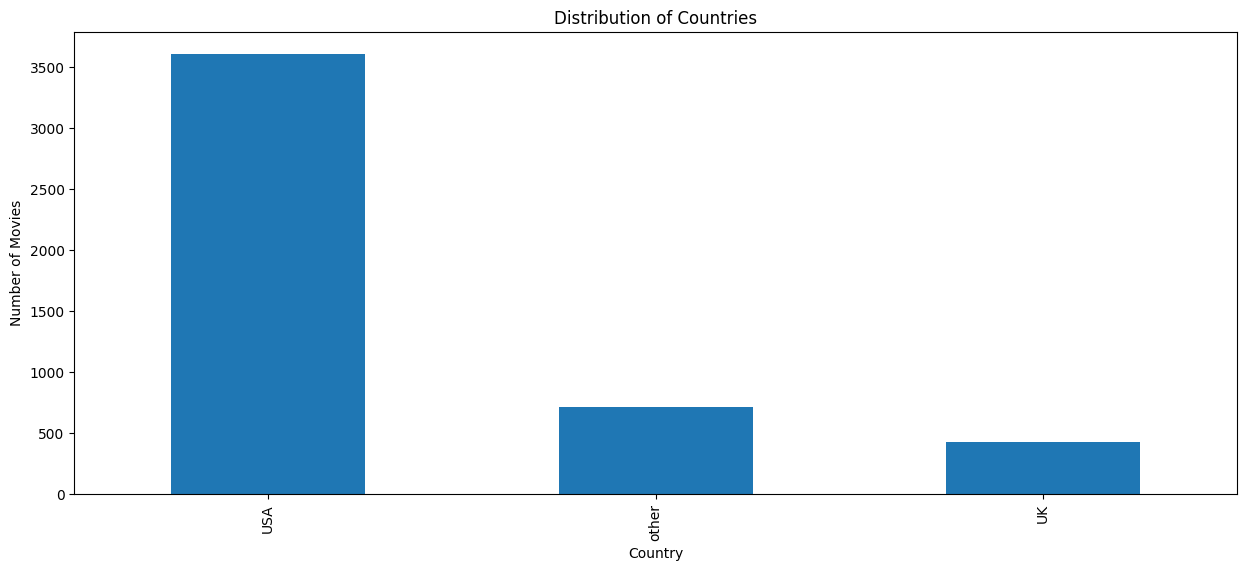

In [95]:
# Plot the distribution of country values
plt.figure(figsize=(15, 6))
df['country'].value_counts().plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Number of Movies')
plt.title('Distribution of Countries')
plt.show()

Text(0.5, 1.0, 'IMDB Score vs Country')

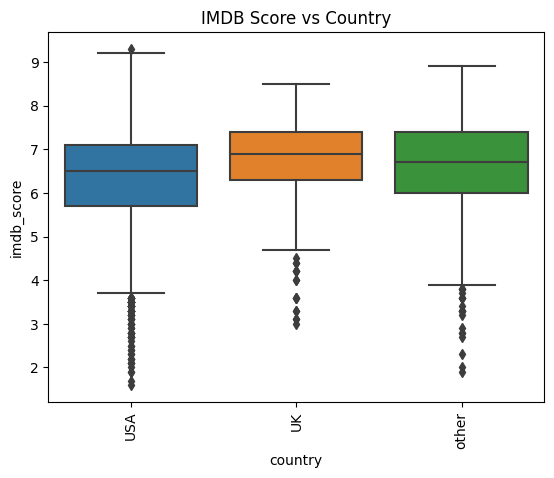

In [96]:
# Plot for visualizing the imdb_score across country
df1 = df['country'].value_counts()
df1 = df1.index.tolist()
sns.boxplot(y='imdb_score', x='country', data=df[df['country'].isin(df1)])
plt.xticks(rotation=90)
plt.title('IMDB Score vs Country')

In [97]:
# Percentage distribution of all the different language in the dataset
((df.language.value_counts())/len(df))*100

English       93.837062
French         1.456311
Spanish        0.738708
Hindi          0.548755
Mandarin       0.506543
German         0.379907
Japanese       0.337695
Russian        0.232165
Cantonese      0.211060
Italian        0.211060
Portuguese     0.168848
Korean         0.168848
Danish         0.105530
Hebrew         0.084424
Persian        0.084424
Norwegian      0.084424
Swedish        0.084424
Dutch          0.084424
Arabic         0.063318
Thai           0.063318
None           0.042212
Aboriginal     0.042212
Indonesian     0.042212
Zulu           0.042212
Dari           0.042212
Hungarian      0.021106
Kazakh         0.021106
Icelandic      0.021106
Maya           0.021106
Bosnian        0.021106
Filipino       0.021106
Czech          0.021106
Telugu         0.021106
Polish         0.021106
Dzongkha       0.021106
Vietnamese     0.021106
Aramaic        0.021106
Urdu           0.021106
Romanian       0.021106
Mongolian      0.021106
Greek          0.021106
Name: language, 

In [98]:
df.loc[df['language'].isin((df['language'].value_counts()[df['language'].value_counts() < 80]).index), 'language'] = 'other'
df.language.value_counts()

English    4446
other       292
Name: language, dtype: int64

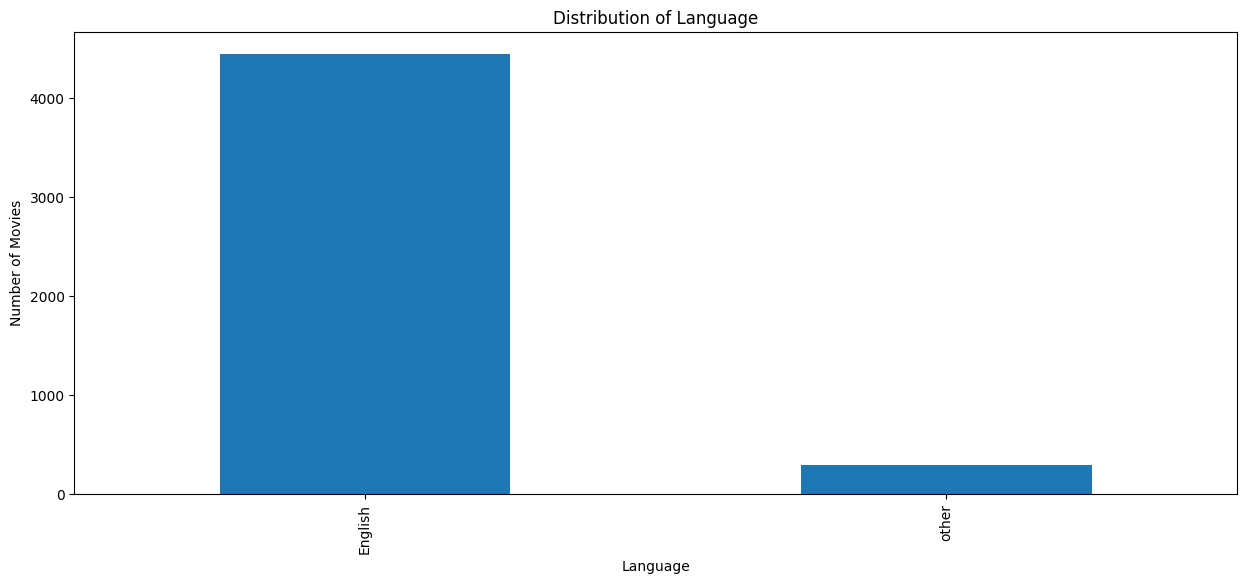

In [99]:
# Plotting the distribution of language values
plt.figure(figsize=(15, 6))
df['language'].value_counts().plot(kind='bar')
plt.xlabel('Language')
plt.ylabel('Number of Movies')
plt.title('Distribution of Language')
plt.show()

Text(0.5, 1.0, 'IMDB Score vs Language')

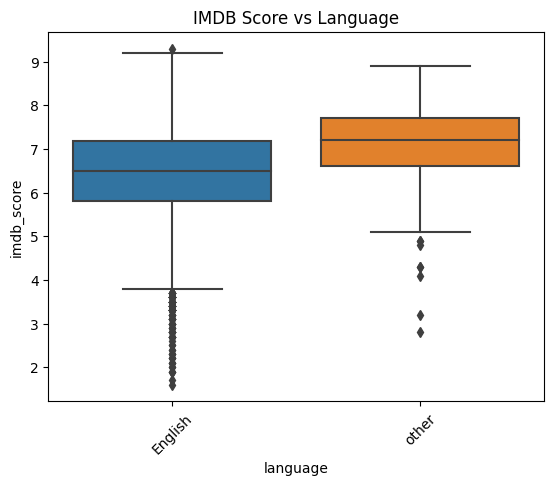

In [100]:
# Boxplot to visualize the distribution of imdb_score over language
df1 = df['language'].value_counts()
df1 = df1.index.tolist()
sns.boxplot(y='imdb_score', x='language', data=df[df['language'].isin(df1)])
plt.xticks(rotation=45)
plt.title('IMDB Score vs Language')

In [101]:
df.loc[df['content_rating'].isin((df['content_rating'].value_counts()[df['content_rating'].value_counts() < 100]).index), 'content_rating'] = 'other'

In [102]:
df.content_rating.value_counts()

R            2068
PG-13        1428
PG            683
Not Rated     287
other         162
G             110
Name: content_rating, dtype: int64

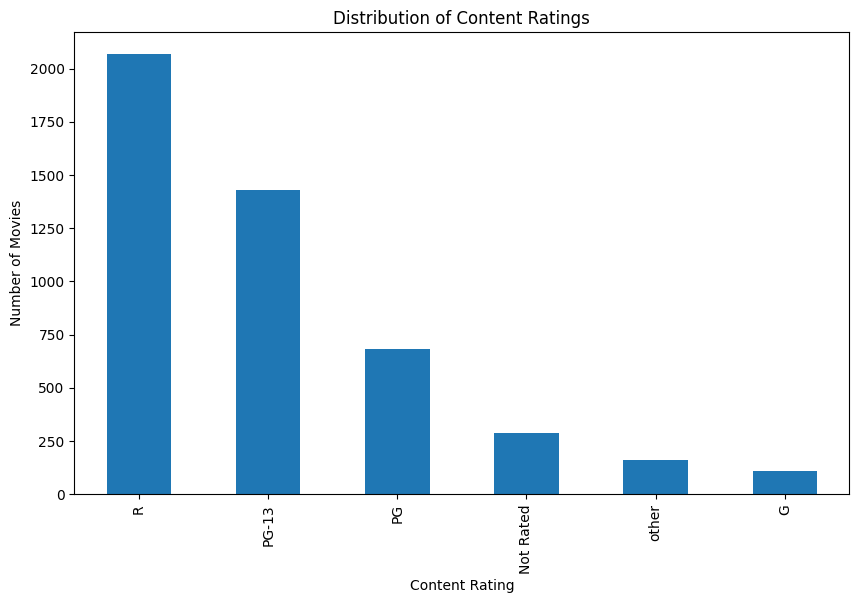

In [103]:
# Plotting the distribution of content_rating values
plt.figure(figsize=(10, 6))
df['content_rating'].value_counts().plot(kind='bar')
plt.xlabel('Content Rating')
plt.ylabel('Number of Movies')
plt.title('Distribution of Content Ratings')
plt.show()

Text(0.5, 1.0, 'IMDB Score vs Content Rating')

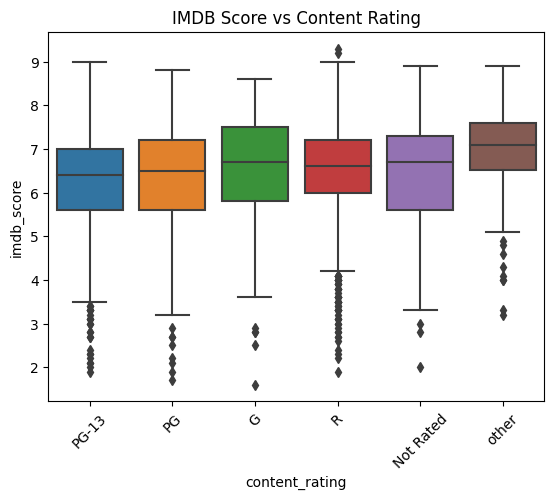

In [104]:
# Plotting the distribution of imdb_score over content_rating
df1 = df['content_rating'].value_counts()
df1 = df1.index.tolist()
sns.boxplot(y='imdb_score', x='content_rating', data=df[df['content_rating'].isin(df1)])
plt.xticks(rotation=45)
plt.title('IMDB Score vs Content Rating')

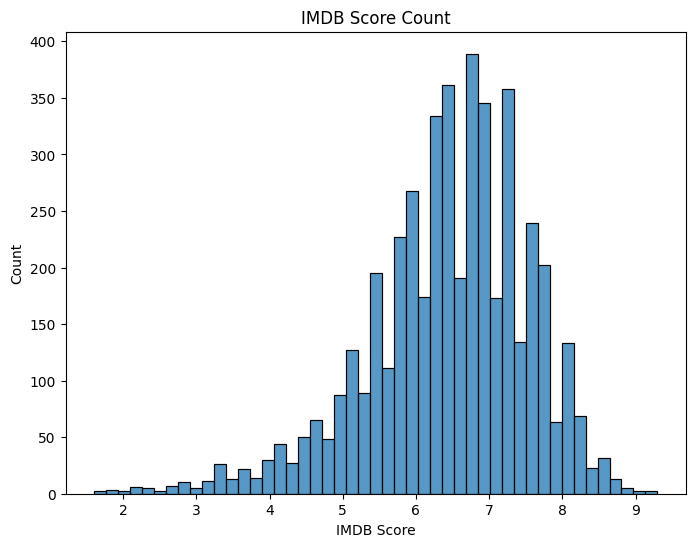

In [105]:
# Plot for visualizing imdb_score
plt.figure(figsize=(8,6))
plt.title('IMDB Score Count')
plt.xlabel('IMDB Score')
sns.histplot(data=df,x='imdb_score')
plt.show()

In [106]:
# Popular Movies and their imdb_score based on the facebook likes for the cast

# Sorting the movies by the cast_total_facebook_likes
df = df.sort_values("cast_total_facebook_likes", ascending=False)

# Print the top 10 movies
print(df[["movie_title", "cast_total_facebook_likes", "imdb_score"]].head(10))

                                 movie_title  cast_total_facebook_likes  \
1902  Anchorman: The Legend of Ron Burgundy                      656730   
1223                  The Final Destination                      303717   
4704                              Treachery                      283939   
4592                               Hardflip                      263584   
4045                                  Feast                      170118   
2939                             Quarantine                      140268   
2269                                Armored                      137712   
2385                  The Amityville Horror                      120797   
74                            Evan Almighty                      108016   
3                     The Dark Knight Rises                      106759   

      imdb_score  
1902         7.2  
1223         5.2  
4704         3.9  
4592         5.6  
4045         6.4  
2939         6.0  
2269         5.7  
2385         6.0  
74 

In [107]:
# Popular Movies and their imdb_score based on the facebook likes for the movie

df = df.sort_values("movie_facebook_likes", ascending=False)

# Print the top 10 movies
print(df[["movie_title", "movie_facebook_likes", "imdb_score"]].head(10))

                              movie_title  movie_facebook_likes  imdb_score
96                          Interstellar                 349000         8.6
296                     Django Unchained                 199000         8.5
10    Batman v Superman: Dawn of Justice                 197000         6.9
128                   Mad Max: Fury Road                 191000         8.1
179                         The Revenant                 190000         8.1
97                             Inception                 175000         8.8
99     The Hobbit: An Unexpected Journey                 166000         7.9
2614                  The Imitation Game                 165000         8.1
3                  The Dark Knight Rises                 164000         8.5
278                          The Martian                 153000         8.1


In [108]:
# Popular Movies and their imdb_score based on the facebook likes for the director

df = df.sort_values("director_facebook_likes", ascending=False)

# Print the top 10 movies
print(df[["movie_title", "director_name", "director_facebook_likes", "imdb_score"]].head(10))

                 movie_title         director_name  director_facebook_likes  \
3672                Don Jon   Joseph Gordon-Levitt                  23000.0   
96             Interstellar      Christopher Nolan                  22000.0   
120           Batman Begins      Christopher Nolan                  22000.0   
97                Inception      Christopher Nolan                  22000.0   
1233           The Prestige      Christopher Nolan                  22000.0   
3     The Dark Knight Rises      Christopher Nolan                  22000.0   
1066               Insomnia      Christopher Nolan                  22000.0   
66          The Dark Knight      Christopher Nolan                  22000.0   
3716                Memento      Christopher Nolan                  22000.0   
1600                  Se7en          David Fincher                  21000.0   

      imdb_score  
3672         6.6  
96           8.6  
120          8.3  
97           8.8  
1233         8.5  
3            8.5

In [109]:
# Movies with top gross income
df1 = pd.DataFrame(zip(df.movie_title, df.gross, df.budget, df.imdb_score), columns=['movies', 'gross', 'budget', 'imdb_score'])
df1 = df1.set_index('gross')
df1 = df1.sort_index(ascending=False)
df1.head(10)

,movies,budget,imdb_score
gross,,,
760505847.0,Avatar,237000000.0,7.9
658672302.0,Titanic,200000000.0,7.7
652177271.0,Jurassic World,150000000.0,7.0
623279547.0,The Avengers,220000000.0,8.1
533316061.0,The Dark Knight,185000000.0,9.0
474544677.0,Star Wars: Episode I - The Phantom Menace,115000000.0,6.5
460935665.0,Star Wars: Episode IV - A New Hope,11000000.0,8.7
458991599.0,Avengers: Age of Ultron,250000000.0,7.5
448130642.0,The Dark Knight Rises,250000000.0,8.5


In [110]:
# Genre of the movies with top imdb_score
df1 = pd.DataFrame(zip(df.movie_title, df.genres.str.split('|'), df.imdb_score), columns=['Movies', 'Genre', 'IMDB_Score'])
df1.head()
df1 = df1.set_index('IMDB_Score')
df1 = df1.sort_index(ascending=False)
df1.head(10)

,Movies,Genre
IMDB_Score,,
9.3,The Shawshank Redemption,"[Crime, Drama]"
9.2,The Godfather,"[Crime, Drama]"
9.0,The Dark Knight,"[Action, Crime, Drama, Thriller]"
9.0,The Godfather: Part II,"[Crime, Drama]"
8.9,The Lord of the Rings: The Return of the King,"[Action, Adventure, Drama, Fantasy]"
8.9,Pulp Fiction,"[Crime, Drama]"
8.9,12 Angry Men,"[Crime, Drama]"
8.9,Schindler's List,"[Biography, Drama, History]"
8.9,"The Good, the Bad and the Ugly",[Western]


In [111]:
# Genre of the movies with top gross value
df1 = pd.DataFrame(zip(df.movie_title, df.genres.str.split('|'), df.gross), columns=['Movies', 'Genre', 'gross'])
df1.head()
df1 = df1.set_index('gross')
df1 = df1.sort_index(ascending=False)
df1.head(10)

,Movies,Genre
gross,,
760505847.0,Avatar,"[Action, Adventure, Fantasy, Sci-Fi]"
658672302.0,Titanic,"[Drama, Romance]"
652177271.0,Jurassic World,"[Action, Adventure, Sci-Fi, Thriller]"
623279547.0,The Avengers,"[Action, Adventure, Sci-Fi]"
533316061.0,The Dark Knight,"[Action, Crime, Drama, Thriller]"
474544677.0,Star Wars: Episode I - The Phantom Menace,"[Action, Adventure, Fantasy, Sci-Fi]"
460935665.0,Star Wars: Episode IV - A New Hope,"[Action, Adventure, Fantasy, Sci-Fi]"
458991599.0,Avengers: Age of Ultron,"[Action, Adventure, Sci-Fi]"
448130642.0,The Dark Knight Rises,"[Action, Thriller]"


In [112]:
# Duration of the movies with top imdb_score
df = df.sort_values("imdb_score", ascending=False)

# Print the top 10 movies
print(df[["movie_title", "duration", "imdb_score"]].head(10))

                                         movie_title  duration  imdb_score
1937                       The Shawshank Redemption      142.0         9.3
3466                                  The Godfather      175.0         9.2
66                                  The Dark Knight      152.0         9.0
2837                         The Godfather: Part II      220.0         9.0
339   The Lord of the Rings: The Return of the King      192.0         8.9
3355                                   Pulp Fiction      178.0         8.9
4822                                   12 Angry Men       96.0         8.9
1874                               Schindler's List      185.0         8.9
4498                 The Good, the Bad and the Ugly      142.0         8.9
97                                        Inception      148.0         8.8


In [113]:
# Most Liked Genres
most_liked=df[df['imdb_score']>=8.5]
most_liked_per=(most_liked['genres'].value_counts())/(df['genres'].value_counts())*100
most_liked_per.sort_values(ascending =False).head(10)

Action|Drama|History|Thriller|War           100.000000
Crime|Drama|Fantasy|Mystery                 100.000000
Adventure|Animation|Drama|Family|Musical    100.000000
Action|Adventure|Drama|Fantasy               50.000000
Action|Biography|Drama|History               50.000000
Action|Drama|Romance                         33.333333
Biography|Drama|War                          25.000000
Drama|Family|Fantasy|Romance                 25.000000
Adventure|Drama|Sci-Fi                       25.000000
Western                                      20.000000
Name: genres, dtype: float64

In [114]:
df['genres'] = df['genres'].str.split('|')

In [115]:
df.genres

1937                                  [Crime, Drama]
3466                                  [Crime, Drama]
66                  [Action, Crime, Drama, Thriller]
2837                                  [Crime, Drama]
339              [Action, Adventure, Drama, Fantasy]
                            ...                     
2295                        [Comedy, Family, Sci-Fi]
4605    [Action, Adventure, Comedy, Fantasy, Sci-Fi]
2268                                        [Comedy]
1136    [Action, Animation, Comedy, Family, Fantasy]
2834                            [Documentary, Music]
Name: genres, Length: 4738, dtype: object

In [116]:
# unique genres available
unique_genres = set(genre for genres_list in df['genres'] for genre in genres_list)

In [117]:
print("Total unique genres:", len(unique_genres))

Total unique genres: 24


In [118]:
print(unique_genres)

{'Sci-Fi', 'Drama', 'Sport', 'Fantasy', 'Musical', 'Documentary', 'Adventure', 'Thriller', 'Comedy', 'History', 'Family', 'Animation', 'Music', 'War', 'News', 'Horror', 'Short', 'Crime', 'Western', 'Romance', 'Mystery', 'Film-Noir', 'Action', 'Biography'}


In [119]:
genre_counter = Counter(genre for genres_list in df['genres'] for genre in genres_list)

In [120]:
total_movies = len(df)
genre_popularity = {genre: count / total_movies for genre, count in genre_counter.items()}

In [121]:
most_popular_genre = max(genre_popularity, key=genre_popularity.get)

In [122]:
print("Genre Popularity:")
for genre, popularity in genre_popularity.items():
    print(f"{genre}: {popularity:.2%}")

print("\nMost Popular Genre:", most_popular_genre)

Genre Popularity:
Crime: 17.67%
Drama: 51.25%
Action: 23.36%
Thriller: 28.30%
Adventure: 18.81%
Fantasy: 12.28%
Biography: 6.04%
History: 4.12%
Western: 1.90%
Sci-Fi: 12.43%
Comedy: 37.86%
Mystery: 9.65%
Romance: 22.48%
War: 4.26%
Horror: 11.29%
Family: 10.95%
Animation: 4.85%
Documentary: 1.98%
Music: 4.28%
Musical: 2.72%
Sport: 3.80%
Film-Noir: 0.13%
News: 0.04%
Short: 0.08%

Most Popular Genre: Drama


In [123]:
# Storing only the first genre, which is the most significant genre for movie in consideration, from the list of values in the genres
df['genres'] = df['genres'].apply(lambda x: x[0])

In [124]:
genre_imdb_scores = df.groupby('genres')['imdb_score'].mean().sort_values(ascending=False)
genre_imdb_scores

genres
Film-Noir      7.600000
Music          7.200000
Biography      7.169231
Documentary    7.150847
Crime          6.862229
Western        6.780000
Drama          6.771061
Mystery        6.690323
Animation      6.556364
Adventure      6.526087
Fantasy        6.434000
Sci-Fi         6.266667
Action         6.225474
Comedy         6.164976
Romance        6.150000
Family         6.140000
Musical        6.000000
Thriller       5.794118
Horror         5.690909
Name: imdb_score, dtype: float64

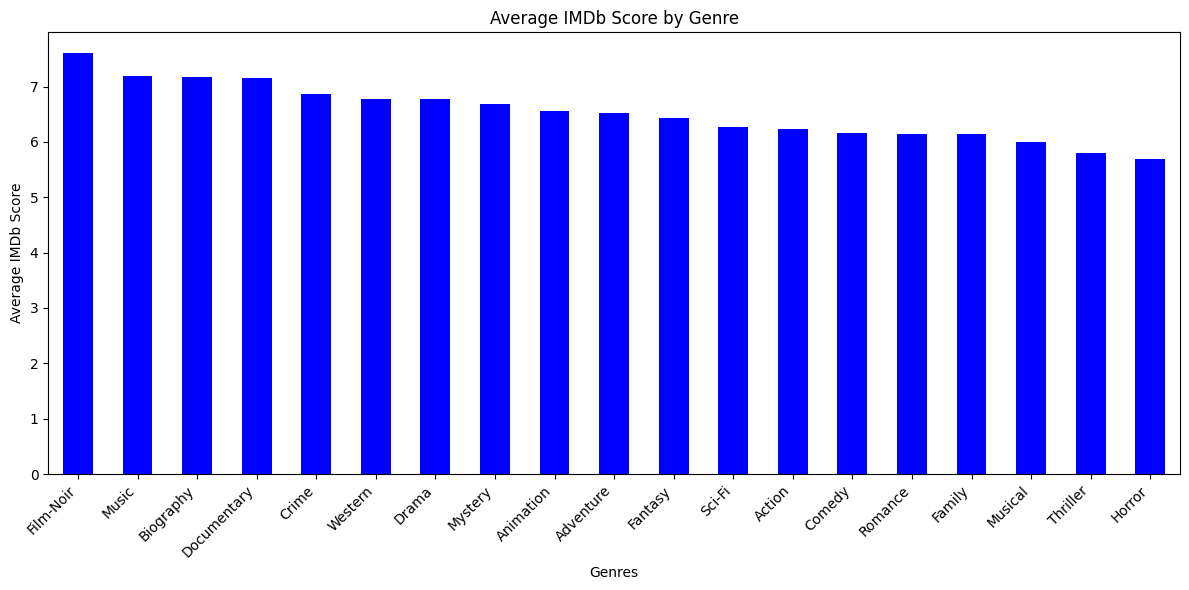

In [125]:
# Visualizing imbd_score over genre
plt.figure(figsize=(12, 6))
genre_imdb_scores.plot(kind='bar', color='blue')
plt.title('Average IMDb Score by Genre')
plt.xlabel('Genres')
plt.ylabel('Average IMDb Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Feature Engineering

In [126]:
df.plot_keywords.nunique()

4653

In [127]:
# Most Liked plots
most_liked=df[df['imdb_score']>=8.5]
most_liked_per=(most_liked['plot_keywords'].value_counts())/(df['plot_keywords'].value_counts())*100
most_liked_per.sort_values(ascending =False).head(10)

16th century|battle|japan|practice|samurai                                         100.0
dynamite|historically inaccurate|ku klux klan|n word|slavery                       100.0
clock tower|delorean|future|time travel|time travel comedy                         100.0
coming of age|male frontal nudity|male nudity|photographer|slum                    100.0
conservatory|drummer|emotional abuse|music school|obsession                        100.0
courtroom|dialogue driven|dialogue driven storyline|jury|murder                    100.0
crime family|mafia|organized crime|patriarch|rise to power                         100.0
criminal|dirty cop|flashback|limping|suspect                                       100.0
curb stomping|neo nazi|prison|son dislikes mother's boyfriend|white supremacist    100.0
death star|empire|galactic war|princess|rebellion                                  100.0
Name: plot_keywords, dtype: float64

In [128]:
df.shape

(4738, 24)

In [129]:
# As the plot_keywords feature is unique to every unique movie, it will not contribute much towards the final prediction, hence I'll drop it
df.drop('plot_keywords', axis=1, inplace=True)

In [130]:
df.director_name.nunique()

2270

In [131]:
# For the feature color, as the majority of the movies in the dataset is of type color, I'll drop it off as it will not have much effect
# on the final prediction
df.drop('color', axis=1, inplace=True)

In [132]:
print("Count of unique First Actor", df.actor_1_name.nunique())
print("Count of unique Second Actor", df.actor_2_name.nunique())
print("Count of unique Third Actor", df.actor_3_name.nunique())

Count of unique First Actor 1947
Count of unique Second Actor 2849
Count of unique Third Actor 3336


In [133]:
df.movie_title.nunique()

4659

In [134]:
# As the movie_title feature is mostly unique, it will not contribute much towards the final prediction, hence I'll drop it
df.drop('movie_title', axis=1, inplace=True)

In [135]:
# As more than 90% movie is in English language, language feature will not contribute much towards the final prediction, hence I'll drop it
df.drop('language', axis=1, inplace=True)

<ipython-input-136-b44747486001>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


<Axes: >

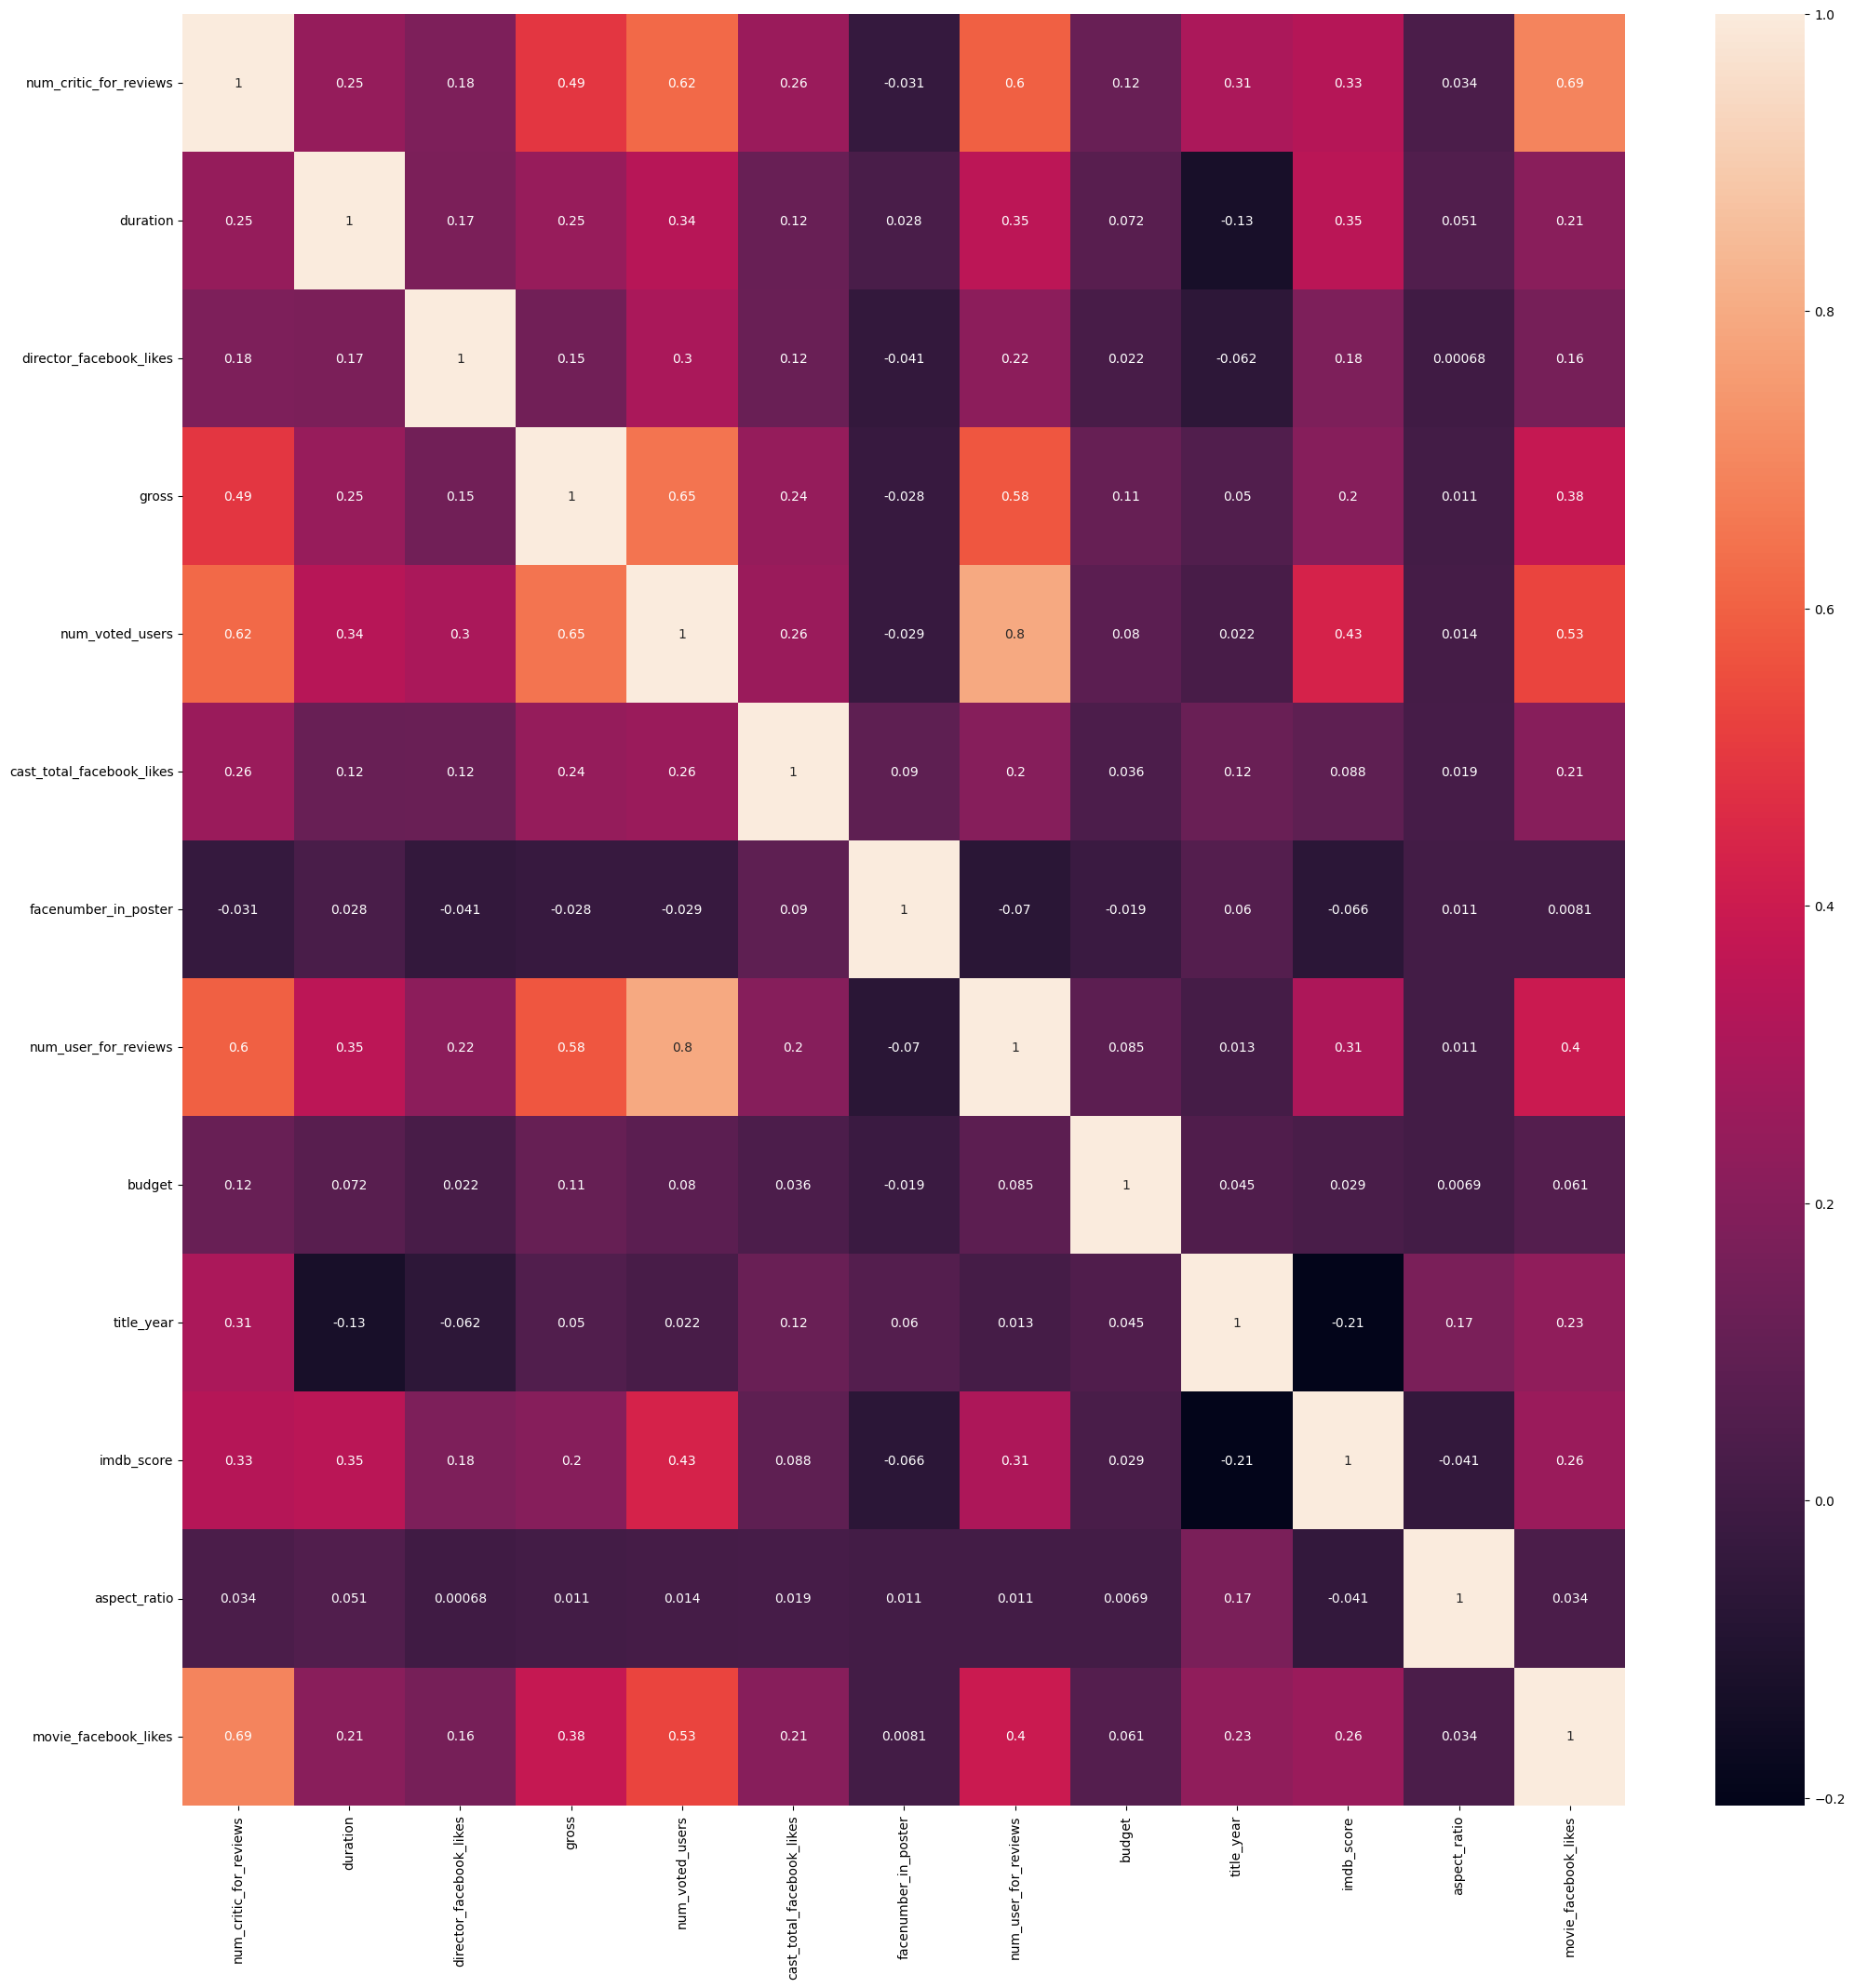

In [136]:
# Plotting heatmap for visualizing the correlation between different numerical features in the dataset
correlation_matrix = df.corr()
plt.figure(figsize=(25, 25))
sns.heatmap(correlation_matrix, annot=True)

#### Ususally, depending upon the problem at hand, and after discussing with the stakeholders, the threshold value for correlation is decided, and one of the two positively correlated feature with correlation value greater than the threshold decided can saftely be dropped as both the positively correlated feature will have same effect on the model, and as per occam's razor principle, we must aim for the smllest feature set possible, using which the task could be done easily.
#### For this problem, I have taken the 0.75 as the threshold and will be dropping of one of the features for the combination having a correlation score of above 0.75

In [137]:
# Correlation between num_voted_users and num_user_for_reviews is 0.8 which is greater than out set threshold
# Dropping off num_user_for_reviews feature
df.drop('num_user_for_reviews', axis=1, inplace=True)

In [138]:
print("Total number of Rows:", df.shape[0])
print("Total number of Columns:", df.shape[1])

Total number of Rows: 4738
Total number of Columns: 19


In [139]:
df.imdb_score.unique()

array([9.3, 9.2, 9. , 8.9, 8.8, 8.7, 8.6, 8.5, 8.4, 8.3, 8.2, 8.1, 8. ,
       7.9, 7.8, 7.7, 7.6, 7.5, 7.4, 7.3, 7.2, 7.1, 7. , 6.9, 6.8, 6.7,
       6.6, 6.5, 6.4, 6.3, 6.2, 6.1, 6. , 5.9, 5.8, 5.7, 5.6, 5.5, 5.4,
       5.3, 5.2, 5.1, 5. , 4.9, 4.8, 4.7, 4.6, 4.5, 4.4, 4.3, 4.2, 4.1,
       4. , 3.9, 3.8, 3.7, 3.6, 3.5, 3.4, 3.3, 3.2, 3.1, 3. , 2.9, 2.8,
       2.7, 2.6, 2.5, 2.4, 2.3, 2.2, 2.1, 2. , 1.9, 1.7, 1.6])

In [140]:
df.imdb_score.dtypes

dtype('float64')

In [141]:
# Binning imdb_score
buckets = [1, 4, 8, 10]

# Label: 0 -> Unsuccessful, 1 -> Average, 2 -> Successful
df['imdb_score_performance'] = pd.cut(df['imdb_score'], bins=buckets, labels=[0, 1, 2])

In [142]:
df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_2_name,gross,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,country,content_rating,budget,title_year,imdb_score,aspect_ratio,movie_facebook_likes,imdb_score_performance
1937,Frank Darabont,199.0,142.0,0.0,Jeffrey DeMunn,28341469.0,Crime,Morgan Freeman,1689764,13495,Bob Gunton,0.0,USA,R,25000000.0,1994.0,9.3,1.85,108000,2
3466,Francis Ford Coppola,208.0,175.0,0.0,Marlon Brando,134821952.0,Crime,Al Pacino,1155770,28122,Robert Duvall,1.0,USA,R,6000000.0,1972.0,9.2,1.85,43000,2
66,Christopher Nolan,645.0,152.0,22000.0,Heath Ledger,533316061.0,Action,Christian Bale,1676169,57802,Morgan Freeman,0.0,USA,PG-13,185000000.0,2008.0,9.0,2.35,37000,2
2837,Francis Ford Coppola,149.0,220.0,0.0,Al Pacino,57300000.0,Crime,Robert De Niro,790926,39960,Robert Duvall,1.0,USA,R,13000000.0,1974.0,9.0,1.85,14000,2
339,Peter Jackson,328.0,192.0,0.0,Billy Boyd,377019252.0,Action,Orlando Bloom,1215718,6434,Bernard Hill,2.0,USA,PG-13,94000000.0,2003.0,8.9,2.35,16000,2


## Handling Outliers

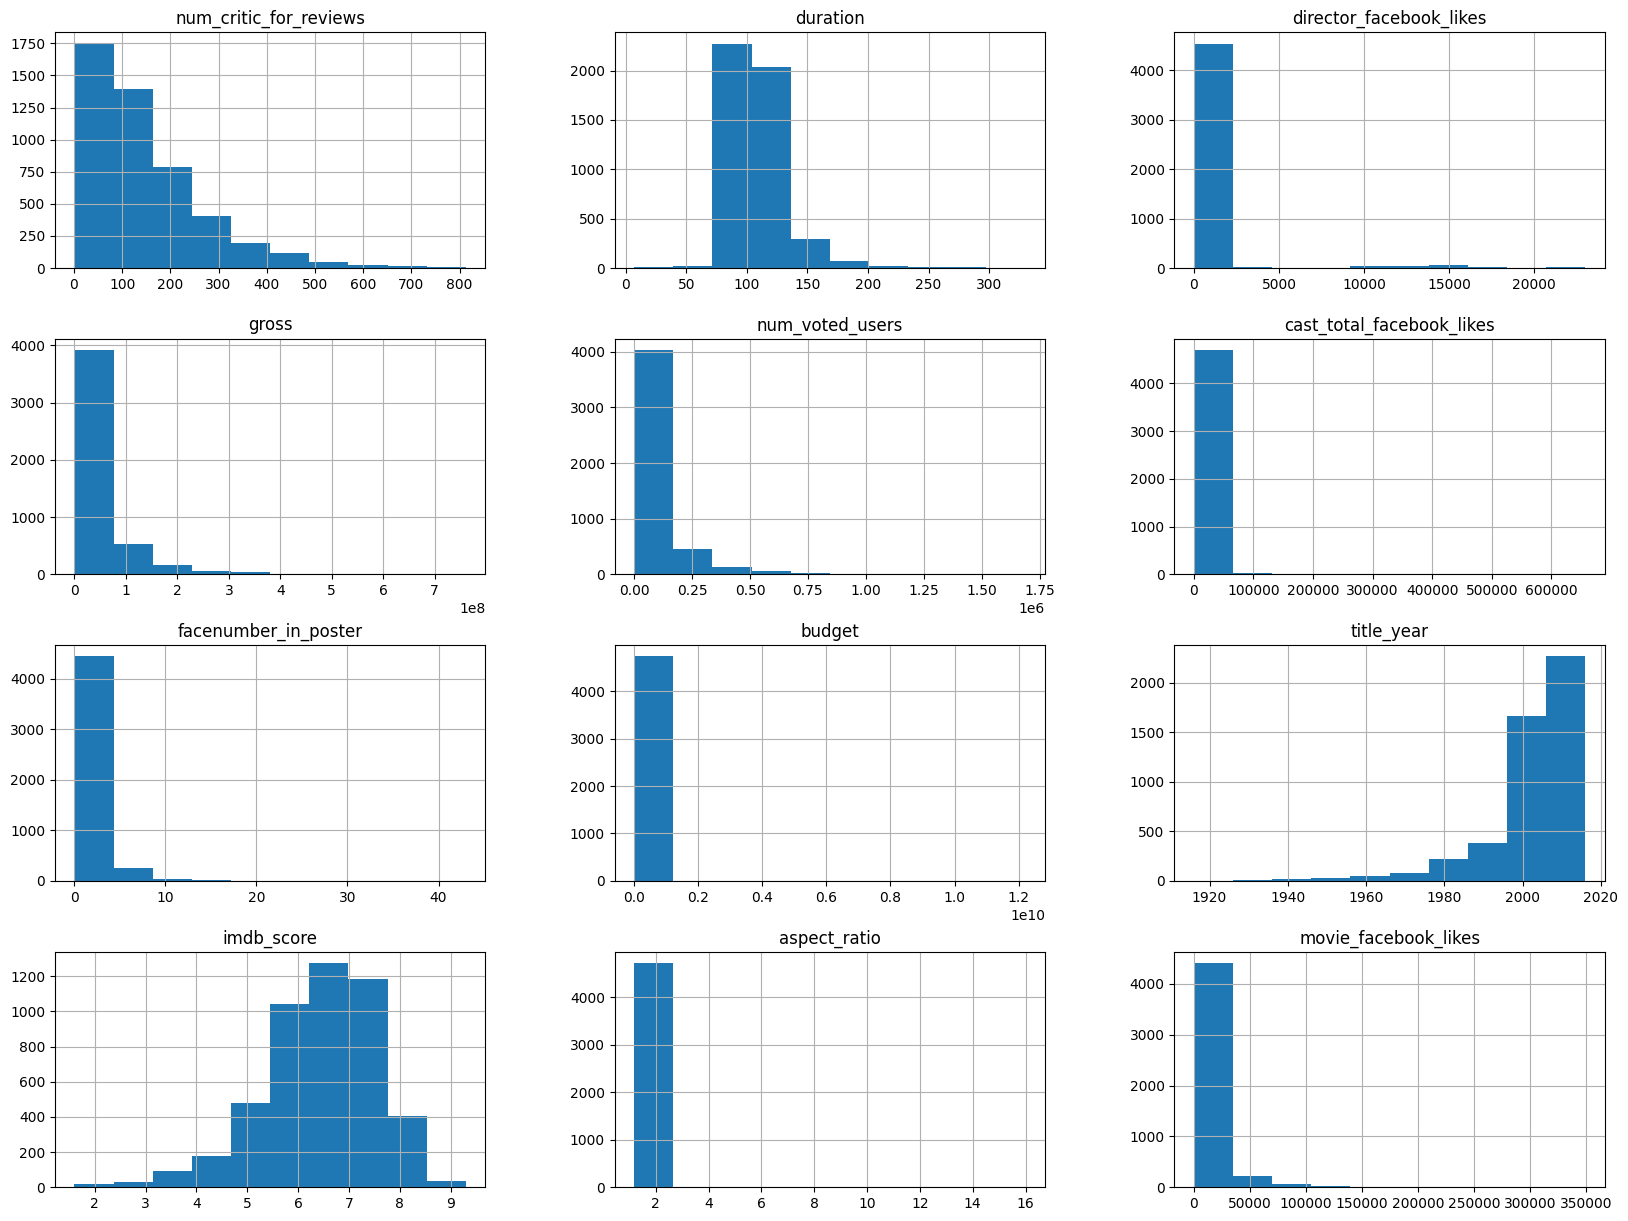

In [143]:
# Checking data distribution
num_bins = 10

df.hist(bins=num_bins, figsize=(20,15))
plt.savefig("histogram_plots")
plt.show()

## Plotting Boxplots for the numerical features

In [144]:
numerical_columns = df.select_dtypes(include=[np.number]).columns

In [145]:
numerical_columns = numerical_columns[numerical_columns != 'imdb_score']
numerical_columns

Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'gross', 'num_voted_users', 'cast_total_facebook_likes',
       'facenumber_in_poster', 'budget', 'title_year', 'aspect_ratio',
       'movie_facebook_likes'],
      dtype='object')

<Axes: >

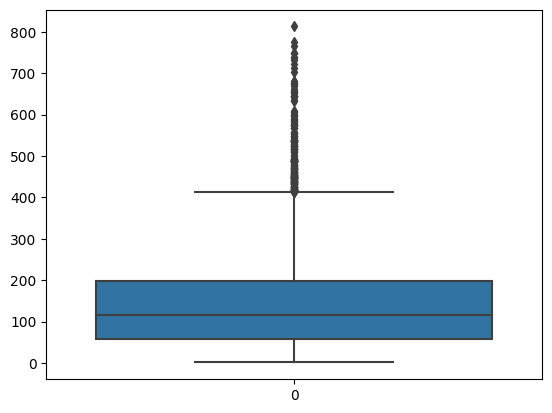

In [146]:
sns.boxplot(data=df['num_critic_for_reviews'])

<Axes: >

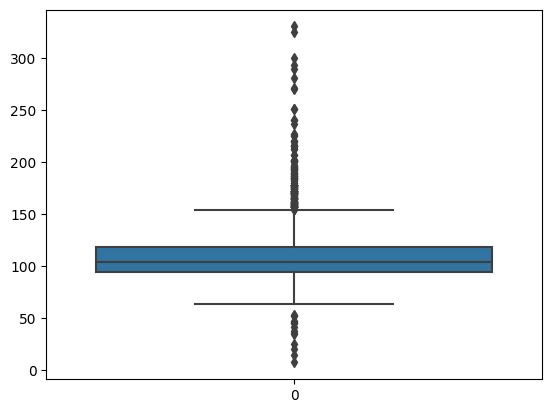

In [147]:
sns.boxplot(data=df['duration'])

<Axes: >

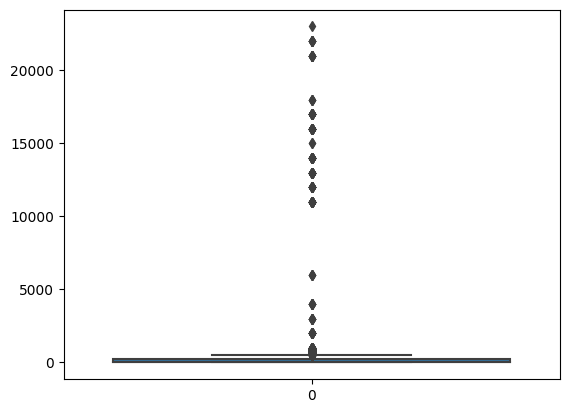

In [148]:
sns.boxplot(data=df['director_facebook_likes'])

<Axes: >

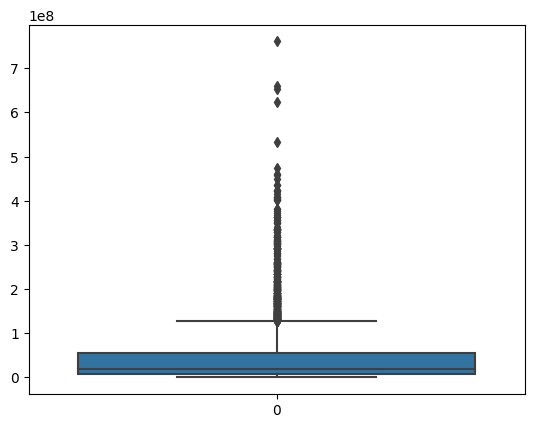

In [149]:
sns.boxplot(data=df['gross'])

<Axes: >

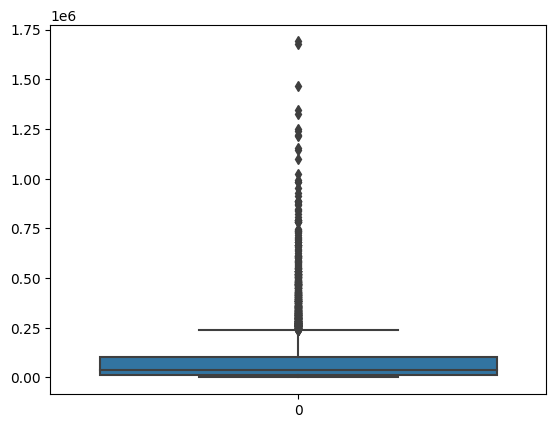

In [150]:
sns.boxplot(data=df['num_voted_users'])

<Axes: >

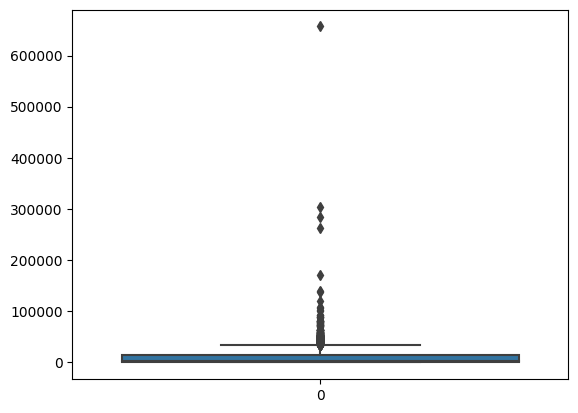

In [151]:
sns.boxplot(data=df['cast_total_facebook_likes'])

<Axes: >

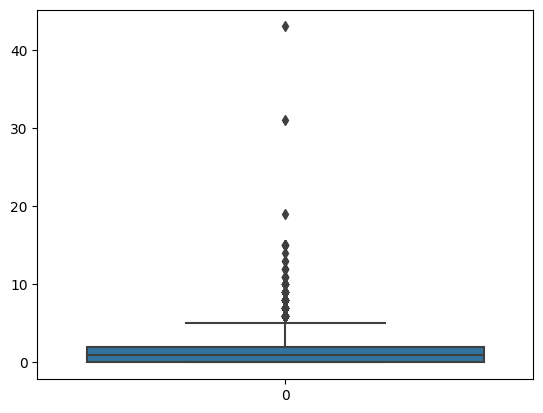

In [152]:
sns.boxplot(data=df['facenumber_in_poster'])

<Axes: >

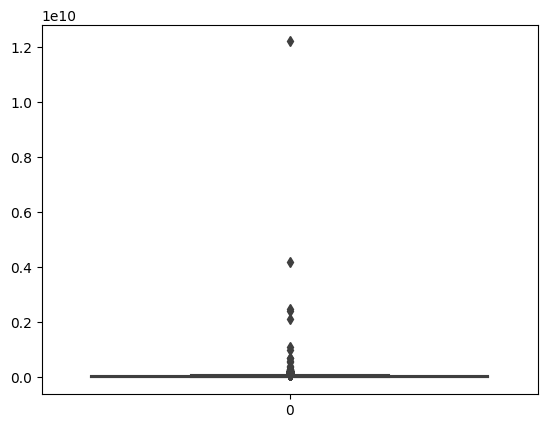

In [153]:
sns.boxplot(data=df['budget'])

<Axes: >

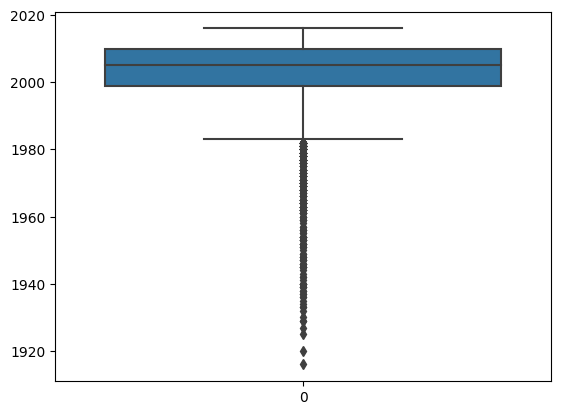

In [154]:
sns.boxplot(data=df['title_year'])

<Axes: >

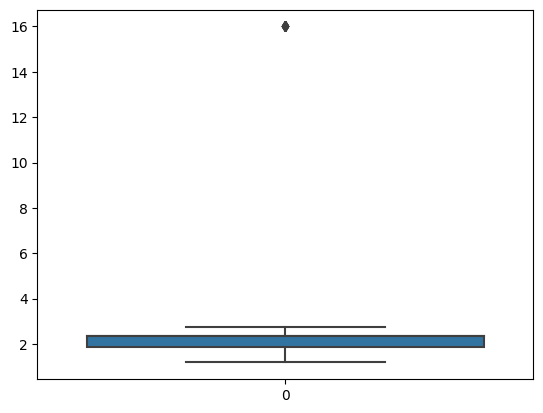

In [155]:
sns.boxplot(data=df['aspect_ratio'])

<Axes: >

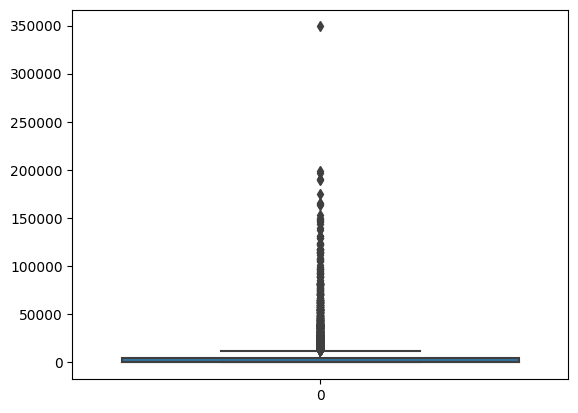

In [156]:
sns.boxplot(data=df['movie_facebook_likes'])

## Logarithmic Transformation
#### To remove skewness of the numerical features

In [157]:
df[numerical_columns] = df[numerical_columns].apply(lambda x: np.log1p(x))

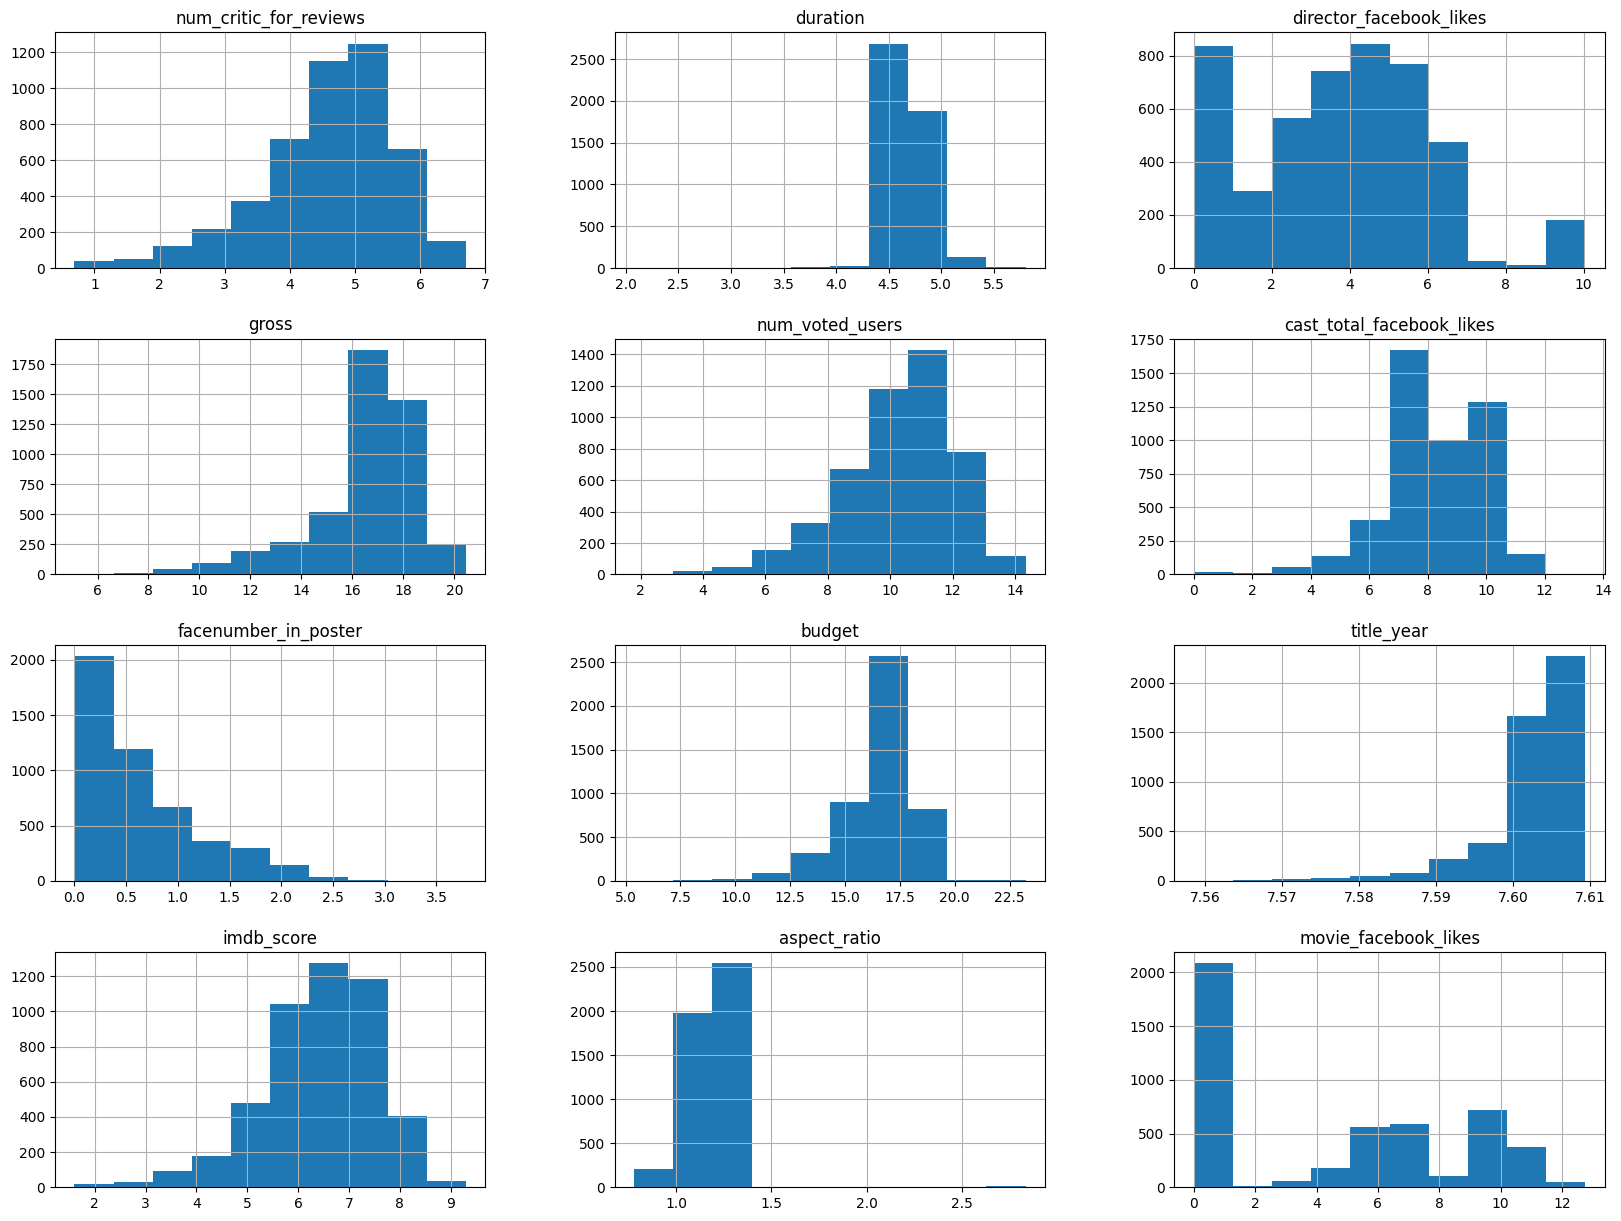

In [158]:
num_bins = 10

df.hist(bins=num_bins, figsize=(20,15))
plt.savefig("histogram_plots")
plt.show()

In [159]:
df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_2_name,gross,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,country,content_rating,budget,title_year,imdb_score,aspect_ratio,movie_facebook_likes,imdb_score_performance
1937,Frank Darabont,5.298317,4.962845,0.000000,Jeffrey DeMunn,17.159837,Crime,Morgan Freeman,14.340100,9.510149,Bob Gunton,0.000000,USA,R,17.034386,7.598399,9.3,1.047319,11.589896,2
3466,Francis Ford Coppola,5.342334,5.170484,0.000000,Marlon Brando,18.719466,Crime,Al Pacino,13.960278,10.244343,Robert Duvall,0.693147,USA,R,15.607270,7.587311,9.2,1.047319,10.668979,2
66,Christopher Nolan,6.470800,5.030438,9.998843,Heath Ledger,20.094625,Action,Christian Bale,14.332022,10.964796,Morgan Freeman,0.000000,USA,PG-13,19.035866,7.605392,9.0,1.208960,10.518700,2
2837,Francis Ford Coppola,5.010635,5.398163,0.000000,Al Pacino,17.863811,Crime,Robert De Niro,13.580961,10.595659,Robert Duvall,0.693147,USA,R,16.380460,7.588324,9.0,1.047319,9.546884,2
339,Peter Jackson,5.796058,5.262690,0.000000,Billy Boyd,19.747807,Action,Orlando Bloom,14.010846,8.769507,Bernard Hill,1.098612,USA,PG-13,18.358805,7.602900,8.9,1.208960,9.680406,2


## Label Encoding Categorical Features

In [160]:
df.dtypes

director_name                  object
num_critic_for_reviews        float64
duration                      float64
director_facebook_likes       float64
actor_2_name                   object
gross                         float64
genres                         object
actor_1_name                   object
num_voted_users               float64
cast_total_facebook_likes     float64
actor_3_name                   object
facenumber_in_poster          float64
country                        object
content_rating                 object
budget                        float64
title_year                    float64
imdb_score                    float64
aspect_ratio                  float64
movie_facebook_likes          float64
imdb_score_performance       category
dtype: object

In [161]:
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['director_name', 'actor_2_name', 'genres', 'actor_1_name',
       'actor_3_name', 'country', 'content_rating'],
      dtype='object')


In [162]:
# For performing Categorical to Numerical encoding, I am avoiding One-Hot Encoding technique as it will dramatically increase the count
# of the total feature set, leading to highly correlated features in the dataset

# Initializing LabelEncoder
label_encoder = LabelEncoder()

In [163]:
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [164]:
df.dtypes

director_name                   int64
num_critic_for_reviews        float64
duration                      float64
director_facebook_likes       float64
actor_2_name                    int64
gross                         float64
genres                          int64
actor_1_name                    int64
num_voted_users               float64
cast_total_facebook_likes     float64
actor_3_name                    int64
facenumber_in_poster          float64
country                         int64
content_rating                  int64
budget                        float64
title_year                    float64
imdb_score                    float64
aspect_ratio                  float64
movie_facebook_likes          float64
imdb_score_performance       category
dtype: object

In [165]:
df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_2_name,gross,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,country,content_rating,budget,title_year,imdb_score,aspect_ratio,movie_facebook_likes,imdb_score_performance
1937,662,5.298317,4.962845,0.000000,1221,17.159837,5,1324,14.340100,9.510149,342,0.000000,1,4,17.034386,7.598399,9.3,1.047319,11.589896,2
3466,655,5.342334,5.170484,0.000000,1789,18.719466,5,26,13.960278,10.244343,2698,0.693147,1,4,15.607270,7.587311,9.2,1.047319,10.668979,2
66,358,6.470800,5.030438,9.998843,1045,20.094625,0,312,14.332022,10.964796,2314,0.000000,1,3,19.035866,7.605392,9.0,1.208960,10.518700,2
2837,655,5.010635,5.398163,0.000000,57,17.863811,5,1546,13.580961,10.595659,2698,0.693147,1,4,16.380460,7.588324,9.0,1.047319,9.546884,2
339,1695,5.796058,5.262690,0.000000,292,19.747807,0,1410,14.010846,8.769507,296,1.098612,1,3,18.358805,7.602900,8.9,1.208960,9.680406,2


In [166]:
df.drop('imdb_score', axis=1, inplace=True)

In [167]:
df.shape

(4738, 19)

#### I am not using any of the Feature Selection algorithm to analyze which features to select for model training because I have already analyzed all the features and have dropped off the features that is unrelated to our prediction variable

## Imbalance Handling

<Axes: xlabel='imdb_score_performance', ylabel='count'>

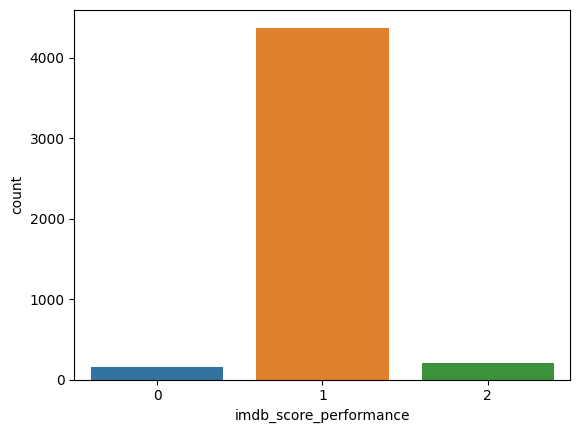

In [168]:
# 0 -> Unsuccessful, 1 -> Average, 2 -> Successful
sns.countplot(x='imdb_score_performance', data=df)

In [169]:
X = df.drop('imdb_score_performance', axis=1)
y = df.imdb_score_performance

In [170]:
def makeOverSamplesADASYN(X,Y):
    sm = ADASYN()
    X, Y = sm.fit_resample(X, Y)
    return(X,Y)

In [171]:
X , y = makeOverSamplesADASYN(X,y)
print ('Shape of oversampled data: {}'.format(X.shape))
print ('Shape of Y: {}'.format(y.shape))

Shape of oversampled data: (13113, 18)
Shape of Y: (13113,)


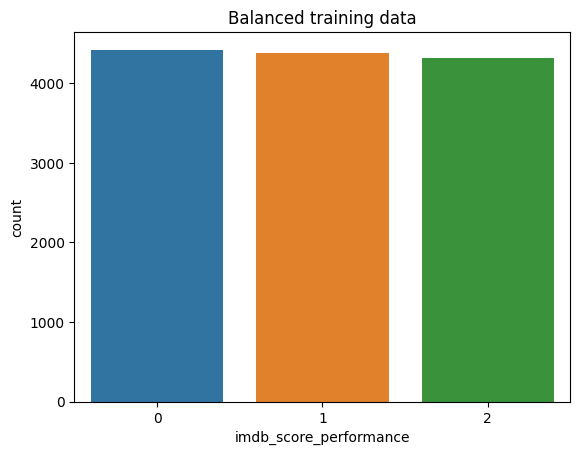

In [172]:
# 0 -> Unsuccessful, 1 -> Average, 2 -> Successful
sns.countplot(x=y)
plt.title('Balanced training data')
plt.show()

In [173]:
# Splitting the dataset into a training ans testing set of ratio 7:3
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3)

## Feature Scaling

In [174]:
# Initializing MinMax Scaler
scaler = MinMaxScaler()

In [175]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Definition and Training

In [176]:
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

## Model Testing and Evaluation

In [177]:
#Predicting the target variable
y_pred = classifier.predict(X_test)
print(y_pred)

[2 0 0 ... 0 0 0]


In [178]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1274,   28,    0],
       [  41, 1260,   25],
       [   8,   18, 1280]])

In [184]:
print("Test set Results")
print ('Accuracy score: {}'.format(accuracy_score(y_test, y_pred)))
print ('Recall score: {}'.format(recall_score(y_test, y_pred, average='macro')))
print ('Precision score: {}'.format(precision_score(y_test, y_pred, average='macro')))
print ('f1-score: {}'.format(f1_score(y_test, y_pred, average='macro')))

Test set Results
Accuracy score: 0.9694966954753431
Recall score: 0.9696042505379646
Precision score: 0.9695279409243254
f1-score: 0.9695269097010014


In [180]:
#Classification Report
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1302
           1       0.96      0.95      0.96      1326
           2       0.98      0.98      0.98      1306

    accuracy                           0.97      3934
   macro avg       0.97      0.97      0.97      3934
weighted avg       0.97      0.97      0.97      3934



#### Output Results:
#### 0 -> Unsuccessful, 1 -> Average, 2 -> Successful

#### The model is performing consistently across different evaluation metric. This denotes that the model is very well generalized and is free from overfitting